# Проект: Исследование стартапов

Имя, Фамилия: Виринея Ильященко   
Дата: 16.03.2025

## Введение

### Цели и задачи

1. Познакомиться с данными о покупках одними компаниями других компаний, о компаниях и раундах финансирования, о сотрудниках и их образовании, оценить их объем, объединить и оценить их полноту и корректность;  
2. Изучить пропущенные значения и провести их обработку, проверить данные на явные и неяные дубликаты, устранить их;  
3. Провести исследование по годам и установить, в каком году наблюдался максимальный размер средств, собранных в рамках одного раунда;
4. Исследовать тенденцию по количеству раундов и выделяемых в рамках каждого раунда средств в разных кварталах 2013 года;
5. Разделить все компании на несколько групп по количеству сотрудников и оценить среднюю долю сотрудников без информации в каждой из групп, обосновать границы групп.
6. Оценить, возможно ли объединить таблицы `people.csv`, `education.csv`, `degrees.cvs` вместе;
7. Определить, подходит ли столбец `network_username` для объединения таблиц; 
8. Привести данные в таблице `company_and_rounds` в вид, который позволит в дальнейшем проводить анализ в разреме отдельных компаний, сохранив при этом данные максимальным образом, их связность и исключив возникающие ошибки., не треюущий дальнейших агрегаций.

### Описание данных

Файл `acquisition.csv`   

Содержит информацию о покупках одними компаниями других компаний:   
`id` — идентификатор покупки.   
`acquiring_company_id` — идентификатор покупающей компании.   
`acquired_company_id` — идентификатор покупаемой компании.   
`term_code` — варианты расчёта.    
`price_amount` — сумма сделки.    
`acquired_at` — дата сделки.    

Файл `company_and_rounds.csv`    

Содержит информацию о компаниях и раундах финансирования:    
`company ID` — идентификатор компании.    
`name` — название компании.    
`category code` — категория области деятельности компании.    
`status` — статус компании.     
`founded at` — дата инвестирования.     
`closed at` — дата закрытия компании.     
`domain` — официальный сайт компании.      
`network username` — ник компании в сети.     
`country code` — код страны компании.     
`investment rounds` — число инвестиционных раундов.     
`funding rounds` — число раундов финансирования.     
`funding total` — сумма финансирования.    
`milestones` — вехи финансирования.    
`funding round id` — идентификатор этапа финансирования.    
`company id` — идентификатор компании.   
`funded at` — дата финансирования.     
`funding round type` — тип финансирования.     
`raised amount` — сумма финансирования.     
`pre money valuation` — предварительная денежная оценка.    
`participants` — число участников.    
`is first round` — является ли раунд первым.     
`is last round` — является раунд последним.     

Файл `people.csv`    

Содержит информацию о сотрудниках:   
`id` — идентификатор сотрудника.    
`first_name` — имя сотрудника.    
`last_name` — фамилия сотрудника.    
`company_id` — идентификатор компании.     
`network_username` — ник в социальных сетях.     

Файл `education.csv`    

Содержит информацию об образовании сотрудника:     
`id` — идентификатор записи об образовании.    
`person_id` — идентификатор работника.     
`instituition` — название учебного заведения.     
`graduated_at` — дата получения образования.     

Файл `degrees.csv`     

Содержит информацию о типе образования сотрудника:    
`id` — идентификатор записи.    
`object_id` — идентификатор сотрудника.    
`degree_type` — тип образования.    
`subject` — специальность.      

### Содержание проекта

1. Знакомство с данными о компаниях и сотрудниках, оценка их объема, оценка их полноты и корректности;  
2. Изучение пропущенных значений и их обработка, проверка данные на явные и неяные дубликаты и их устранение; 
3. Исследование, в каком году размер средств, собранных в рамках одного раунда, был максимален;
4. Определние тенденции количества раундов и выделяемых в рамках каждого раунда средств за разные периоды 2013 года;
5. Группировка всех компаний на несколько групп по количеству сотрудников, с обоснованием выбранных границ, и оценка средней доли сотрудников без информации в каждой из групп,.
6. Оценка возможности объединения таблиц `people.csv`, `education.csv`, `degrees.cvs в одну`;
7. Исследование возможности объединения таблицпо столбцу `network_username`;
8. Приведение данных в таблице `company_and_rounds` к максимально полному, корректому и оптимальному для дальнейших исследований виду.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка


In [1]:
pip install matplotlib-venn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Подключим необходимые для выполнения проекта библиотеки 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import numpy as np 

In [4]:
# Для знакомства с датасетом выведем первые пять пять строк файла `acquisition.csv` и информацию о нем 

In [5]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

display(df_acquisition.head())
df_acquisition.info()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


- Датафрейм `df_acquisition` состоит из 6 столбцов и 9407 строк. 
- Названия столбцов указаны в snake case, поэтому переименовывать столбцы нет необходимости. 
- В столцах `term_code` и `acquired_at` встречаются пропуски.
- Для столбца `acquired_at`  так же необходимо привести тип данный к `datetime64`, для столбцов `id`, `acquiring_company_id`, `acquired_company_id` и `acquired_company_id` можно попробовать оптимизировать тип данных `int64`.

In [6]:
# Для знакомства с датасетом выведем первые пять пять строк файла `company_and_rounds.csv` и информацию о нем 

In [7]:
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

display(df_company_and_rounds.head())
df_company_and_rounds.info()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

- Датафрейм `df_acquisition` состоит из 22 столбцов и 217774 строк. 
- В названия столбцов слова разделены пробелами, приведем из к snake case, также для `company  ID` необходимо перевести верхний регистр в нижний. 
- Во всех столбцах встречаются пропуски.
- Для столбца `founded  at`, `closed at` и `funded  at` необходимо привести тип данный к `datetime64`, для столбцов `company  ID`, `is  first  round`, `is  last  round` можно тип данных `float64` привести к типу данных `int64`, т.к. `company  ID` в датафейме `df_acquisition` имеет тип данных `int64`, а `is  first  round` и `is  last  round` представлены булевыми значениями.


In [8]:
# Напишем функцию, которая заменит проблемы в названии столбцов на _ 

In [9]:
def col_to_snake_case(df):
    for column in df.columns:
        str_bad = column
        for i in range(0, len(str_bad)):
            if str_bad[i] == ' ':
                str_bad = str_bad[:i] + '_' + str_bad[i+1:]
        df = df.rename(columns = {column: str_bad}) 
    for column in df.columns:
        str_bad = column
        for i in range(0, len(str_bad)-3):
            if (str_bad[i] == '_') & (str_bad[i+1] == '_'):
                str_bad = str_bad[:i] + '_' + str_bad[i+2:]
        df = df.rename(columns = {column: str_bad})   
    return df

In [10]:
# Применим функцию col_to_snake_case к датафрейму df_company_and_rounds и проверим результат

In [11]:
df_company_and_rounds = col_to_snake_case(df_company_and_rounds) 

print(df_company_and_rounds.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')


- Следующая проблема связана с тем, что в таблице есть два столца `company_ID` и `company_id`, имеющие одинаковое описание и разное количество заполненных строк. К ней вернемся позже.

In [12]:
# Для знакомства с датасетом выведем первые пять пять строк файла `acquisition.csv` и информацию о нем 

In [13]:
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

display(df_people.head())
df_people.info()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


- Датафрейм `df_people` состоит из 5 столбцов и 226709 строк. 
- Названия столбцов указаны в snake case, поэтому переименовывать столбцы нет необходимости. 
- В столцах `company_id` и `network_username` встречаются пропуски.
- Для столбца `id` и `company_id` можно попробовать оптимизировать тип данных `int64` и `float64`.

In [14]:
# Для знакомства с датасетом выведем первые пять пять строк файла `education.csv` и информацию о нем 

In [15]:
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

display(df_education.head())
df_education.info()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


- Датафрейм `df_education` состоит из 4 столбцов и 109610 строк. 
- Названия столбцов указаны в snake case, поэтому переименовывать столбцы нет необходимости. 
- В столцах `instituition` и `graduated_at` встречаются пропуски.
- Для столбца `graduated_at`  так же необходимо привести тип данный к `datetime64`, для столбцов `id` и `person_id` можно попробовать оптимизировать тип данных `int64`.

In [16]:
# Для знакомства с датасетом выведем первые пять пять строк файла `degrees.csv` и информацию о нем 

In [17]:
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

display(df_degrees.head())
df_degrees.info()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


- Датафрейм `df_degrees` состоит из 4 столбцов и 109609 строк. 
- Названия столбцов указаны в snake case, поэтому переименовывать столбцы нет необходимости. 
- В столцах `degree_type` и `subject` встречаются пропуски.
- Для столбцов `id` можно попробовать оптимизировать тип данных `int64`.  
- Обратим внимание, что столбец `person_id` в `df_education` и `object_id` в `df_degrees` хранят одинаковую информацию, но в датафрейме `df_degrees` перед числовым значением добавлены символы `p:`.

### Выводы:  
- Представленные данные соотвествуют описанию.
- В каждой таблице присутсвуют пропуски, которвые необходимо будет обработать.
- В каждой таблице есть данные, которые необходимо привести к более оптимальному типу данных или разрядности.
- Названия столбцов датафрейма `df_company_and_rounds` было максимально приведено к snake case, но требуется отдельный анализ в виду наличия столбцов `company_ID` и `company_id`.

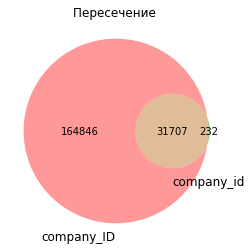

In [18]:
first_id = set(df_company_and_rounds['company_ID'].dropna().unique())
second_id = set(df_company_and_rounds['company_id'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels = ('company_ID', 'company_id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 

### 1.2. Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [19]:
# Проведем необходимое преобразование данных и оптимизацию для датафрейма df_acquisition

In [20]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'], errors='coerce')

for column in ['id', 'acquiring_company_id', 'acquired_company_id', 'price_amount']:
    df_acquisition[column] = pd.to_numeric(df_acquisition[column], downcast = 'integer')
    

In [21]:
# Изучим результат преобразований

In [22]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


- Столбец `acquired_at` теперь имеет тип данных `datetime64`, что является более оптимальным для даты сделки.
- Столбцы `id`, `acquiring_company_id` и `acquired_company_id` теперь имеют тип данных `int16`, `int32`, `int32`, соотвественно, что уменьшит нагрузку при обработке данных.
- Столбец `acquired_at` сохранил тип данных `int64`.

In [23]:
# Проведем необходимое преобразование данных и оптимизацию для датафрейма df_company_and_rounds

In [24]:
df_company_and_rounds[
    ['founded_at', 'closed_at', 'funded_at']] = df_company_and_rounds[
    ['founded_at', 'closed_at', 'funded_at']].astype('datetime64')

for column in [
    'company_ID', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones','funding_round_id', 
    'company_id', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']:
    df_company_and_rounds[column] = pd.to_numeric(df_company_and_rounds[column], downcast = 'float')

# Изучим результат преобразований

In [25]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

- Столбецы `founded_at`, `closed_at` и `funded_at` теперь имеют тип данных `datetime64`, что является более оптимальным для даты.
- Столбцы `company_ID`, `investment_rounds`, `funding_rounds`,`funding_total`, `milestones`, `funding_round_id`, `company_id`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` теперь имеют тип данных `float32`, соотвественно, что уменьшит нагрузку при обработке данных.

In [26]:
# Проведем необходимое преобразование данных и оптимизацию для датафрейма df_people

In [27]:
df_people['id'] = pd.to_numeric(df_people['id'], downcast = 'integer')
df_people['company_id'] = pd.to_numeric(df_people['company_id'], downcast = 'float')

In [28]:
# Изучим результат преобразований

In [29]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int32  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float32
 4   network_username  38867 non-null   object 
dtypes: float32(1), int32(1), object(3)
memory usage: 6.9+ MB


- Столбцы `id` и `company_id ` теперь имеют тип данных `int32` и `float32`, соотвественно, что уменьшит нагрузку при обработке данных.

In [30]:
# Проведем необходимое преобразование данных и оптимизацию для датафрейма df_education

In [31]:
for column in ['id', 'person_id']:
    df_education[column] = pd.to_numeric(df_education[column], downcast = 'integer')

In [32]:
# Изучим результат преобразований

In [33]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int32 
 1   person_id     109610 non-null  int32 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int32(2), object(2)
memory usage: 2.5+ MB


- Столбцы `id` и `person_id ` теперь имеют тип данных `int32`, что уменьшит нагрузку при обработке данных.

In [34]:
# Проведем необходимое преобразование данных и оптимизацию для датафрейма df_education

In [35]:
df_degrees['id'] = pd.to_numeric(df_degrees['id'], downcast = 'integer')

In [36]:
# Изучим результат преобразований

In [37]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


- Столбец `id` теперь имеет тип данных `int32`, что уменьшит нагрузку при обработке данных.

In [38]:
# Исследуем абсолютную и относительную величину пропусков для датафрейма df_acquisition

In [39]:
na_abs = df_acquisition.isna().sum()
na_rel = round(df_acquisition.isna().sum()/len(df_acquisition)*100, 2)
df_na = pd.DataFrame({'abs': na_abs, 'rel': na_rel})
print(df_na)

                       abs    rel
id                       0   0.00
acquiring_company_id     0   0.00
acquired_company_id      0   0.00
term_code             7576  80.54
price_amount             0   0.00
acquired_at             29   0.31


- Пропуски в столбце `term_code` занимают 80.54 процента, что не подходит для дальнейших исследований, но в нашем проекте мы не будем использовать этот столбец, поэтому оставим его, поставив заглушку `no data`.
- Пропуски в столбце `acquired_at` занимают 0,31, что менее одного процента, поэтому удалим их, посчитаем количество удаленных строк.

In [40]:
# Заполним пропуски в столбце `term_code` текстом `no data`

In [41]:
df_acquisition['term_code'] = df_acquisition['term_code'].fillna('no data')

In [42]:
# Изучим результат преобразований

In [43]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             9407 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB


- В датафрейме `df_acquisition` заполнены пропуски в столбце `term_code` заглушкой `no data` и удалено 0.31% пропусков в столбце `acquired_at`.

In [44]:
# Исследуем абсолютную и относительную величину пропусков для датафрейма df_company_and_rounds

In [45]:
na_abs = df_company_and_rounds.isna().sum()
na_rel = round(df_company_and_rounds.isna().sum()/len(df_company_and_rounds)*100, 2)
df_na = pd.DataFrame({'abs': na_abs, 'rel': na_rel})
print(df_na)

                        abs    rel
company_ID              302   0.14
name                    302   0.14
category_code         73888  33.93
status                  302   0.14
founded_at           107818  49.51
closed_at            214325  98.42
domain                70615  32.43
network_username     122240  56.13
country_code         109167  50.13
investment_rounds       302   0.14
funding_rounds          302   0.14
funding_total           302   0.14
milestones              302   0.14
funding_round_id     164846  75.70
company_id           164846  75.70
funded_at            165094  75.81
funding_round_type   164846  75.70
raised_amount        164846  75.70
pre_money_valuation  164846  75.70
participants         164846  75.70
is_first_round       164846  75.70
is_last_round        164846  75.70


- Столбцы `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` содержат 0.14, что составляет менее 1%, такие строки можно удалить.
- Столбцы `category_code` и `country_code` содержат 33.93% и 50.13% пропусков соотвественно, что могло бы негативно отразиться на результатах исследования, но в нашем проекте мы не будем использовать этот столбец, поэтому оставим его, поставив заглушку `no data`.
- Столбец `closed_at` содержит 98.42%, это очень высокий показатель, который наверняка связано с тем, что компания продолжает работать по сегодняшний день. 
- Доля пропусков в столбцах `domain` и `network_username` равно 32.43% и 56.13% соотвественно, что может быть связано с отсутствием официального сайта или отсутсвием некоторых компаний в сети.
- Столбцы `funding_round_id`, `company_id`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round` имеют одинаковую долю пропусков 75.70% (`funded_at` - 75.81%), есть вероятность, что эти данные взяли из другого источника, который характеризует компании, которые уже получили инвестиции.
- Столбец `founded_at` содержит 49.51%, что может быть связано с тем, что в компанию в принципе еще не инвестировали средства. 

- Проверим предположение, что столбцы после `funding_round_id` взяты для тех компаний, в которые уже инвестировали средства - посчитаем число ненулевых строк в столбце `founded_at` и `company_id`, сравним полученные значения.

In [46]:
# Посчитаем число ненулевых строк в столбце `founded_at` и `company_id`

In [47]:
founded_at_na = df_company_and_rounds['founded_at'].isna().sum()
founded_at_without_na = df_company_and_rounds.shape[0] - founded_at_na

company_id_na = df_company_and_rounds['company_id'].isna().sum()
company_id_without_na = df_company_and_rounds.shape[0] - company_id_na

print(f'Число ненулевых строк в столбце founded_at: {founded_at_without_na}') 
print(f'Число ненулевых строк в столбце company_id: {company_id_without_na}')

Число ненулевых строк в столбце founded_at: 109956
Число ненулевых строк в столбце company_id: 52928


- Число ненулевых строк в столбце `founded_at`: 109956, в 2.07 раза больше, чем число ненулевых строк в столбце `company_id`: 52928. Одназначный вывод сделать сейчас нельзя, но можно в дальнейшем проверить не произошло ли дублирование данных на одном из этапов обработки полученных данных.
- В нынешнем виде датафрейм `df_company_and_rounds` выглядит ненадежным для дальнейших исследований и требует тщательной обработки перед продолжением работы с ним.

In [48]:
# Удалим пропуски в столбцах company_ID, name, status, investment_rounds, funding_rounds, funding_total, milestones

In [49]:
str_count = df_company_and_rounds.shape[0]

for column in ['company_ID', 'name', 'status', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']:
    df_company_and_rounds = df_company_and_rounds.dropna(subset = [column]) 
    
str_del = str_count - df_company_and_rounds.shape[0] # Количество удаленных строк - абсолютное значение
str_del_percent = round((str_del/str_count * 100), 2)

print(f'Количество удаленных строк: {str_del} или {str_del_percent}%' )      

Количество удаленных строк: 302 или 0.14%


In [50]:
# Изучим результат преобразований

In [51]:
df_company_and_rounds.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

- В датафрейме `df_company_and_rounds` удалено суммарно 0.14% пропусков столбцах `company_ID`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`.
- В нынешнем виде датафрейм `df_company_and_rounds` требует более тщательной обработки нежели работа с пропусками.

In [52]:
# Исследуем абсолютную и относительную величину пропусков для датафрейма df_people

In [53]:
na_abs = df_people.isna().sum()
na_rel = round(df_people.isna().sum()/len(df_people)*100, 4)
df_na = pd.DataFrame({'abs': na_abs, 'rel': na_rel})
print(df_na)

                     abs      rel
id                     0   0.0000
first_name             5   0.0022
last_name              1   0.0004
company_id        192094  84.7315
network_username  187842  82.8560


- Пропуски в столбце `company_id` занимают 84.73 процента, возможно человек в данный момент не работает ни в одной из компаний, участвующих в исследовании и у таких компаний нет идентификатора или человек не работает в принцпе.Поставим заглушку -1, так как идентификатор не может быть отрицательным числом.
- Пропуски в столбце `network_username` составляют 82.86 процента, что может быть связано с отсутсвием у человека аккаунта в социальных сетях, заполним такие пропуски текстом `no data`.
- Доля пропусков в столбцах `first_name` и `last_name` равна 0.0022% и 0.0004% соотвественно, это составляет менее одного процента, поэтому удалим их, посчитав количество удаленных строк.

In [54]:
# Заполним пропуски в столбцах `company_id` и `network_username`

In [55]:
df_people['company_id'] = df_people['company_id'].fillna(-1)
df_people['network_username'] = df_people['network_username'].fillna('no data')

In [56]:
# Исследуем абсолютную и относительную величину пропусков для датафрейма df_education

In [57]:
na_abs = df_education.isna().sum()
na_rel = round(df_education.isna().sum()/len(df_education)*100, 2)
df_na = pd.DataFrame({'abs': na_abs, 'rel': na_rel})
print(df_na)

                abs    rel
id                0   0.00
person_id         0   0.00
instituition     55   0.05
graduated_at  51556  47.04


- Пропуски занимают 0.05% данных в столбце `instituition`, что составляет меньше одного процента, такие строки можно удалить.
- В столбце `graduated_at` содержится 47.04% пропусков, что может быть связано с той категорией людей, которые еще продолжают получать образование и не закончили учебное заведение, что не удивительно для стартапов. Остаим их в неизменном виде.

In [58]:
# Исследуем абсолютную и относительную величину пропусков для датафрейма df_degrees

In [59]:
na_abs = df_degrees.isna().sum()
na_rel = round(df_degrees.isna().sum()/len(df_degrees)*100, 2)
df_na = pd.DataFrame({'abs': na_abs, 'rel': na_rel})
print(df_na)

               abs    rel
id               0   0.00
object_id        0   0.00
degree_type  11218  10.23
subject      28312  25.83


- Столбцы `degree_type` и `subject` содержат 10.23% и 25.83% пропусков соотвественно, что могло бы негативно отразиться на результатах исследования, но в нашем проекте мы не будем использовать этот столбец, поэтому оставим такие пропуски, поставив заглушку `no data`.

In [60]:
# Заполним пропуски в столбцы degree_type и subject и проверим результат

In [61]:
for column in ['degree_type', 'subject']:
    df_degrees[column] = df_degrees[column].fillna('no data') 
    
df_degrees.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int32 
 1   object_id    109610 non-null  object
 2   degree_type  109610 non-null  object
 3   subject      109610 non-null  object
dtypes: int32(1), object(3)
memory usage: 2.9+ MB


- В датафрейме `df_degrees` заполнены пропуски в столбцах `degree_type` и `subject` текстом `no data` 

In [62]:
# Проверим датафреймы на явные дубликаты 

In [63]:
dataFrames = {
    'df_acquisition' : df_acquisition,
    'df_company_and_rounds' : df_company_and_rounds,
    'df_people' : df_people,
    'df_education' : df_education,
    'df_degrees' : df_degrees
}

for name, df in dataFrames.items():
    count_of_duplicates = df.duplicated().sum() 
    print(f'Количество дубликатов в датафрейме {name} = {count_of_duplicates}')

Количество дубликатов в датафрейме df_acquisition = 0
Количество дубликатов в датафрейме df_company_and_rounds = 0
Количество дубликатов в датафрейме df_people = 0
Количество дубликатов в датафрейме df_education = 0
Количество дубликатов в датафрейме df_degrees = 0


- Явных дубликатов в данных не обнаружено.

- Для каждого датафрейма была проведена замена типа данных на более подходящий и выполнена оптимизация типа данных6 чтобы уменьшить нагрузку во время обработки данных.
- В каждом датафрейме была выполнена оценка абсолютного и относительного числа пропусков, проведена работа с обнаруженными пропусками.
- Ни в одном датафрейме не обнаружено явных дубликатов.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание выполниется без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответим на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [64]:
# Добавим столбец funded_at_year, в которой на основании столбца funded_at выделим год финансирования

In [65]:
df_company_and_rounds['funded_at_year'] = df_company_and_rounds['funded_at'].dt.year

In [66]:
# Изучим результат преобразований

In [67]:
display(df_company_and_rounds.head())
df_company_and_rounds.info()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

In [68]:
# Построим и изучим диаграмму размаха, чтобы подобрать аггрегирующую функцию для вычисления типичный размер средств, 
# выделяемого в рамках одного раунда

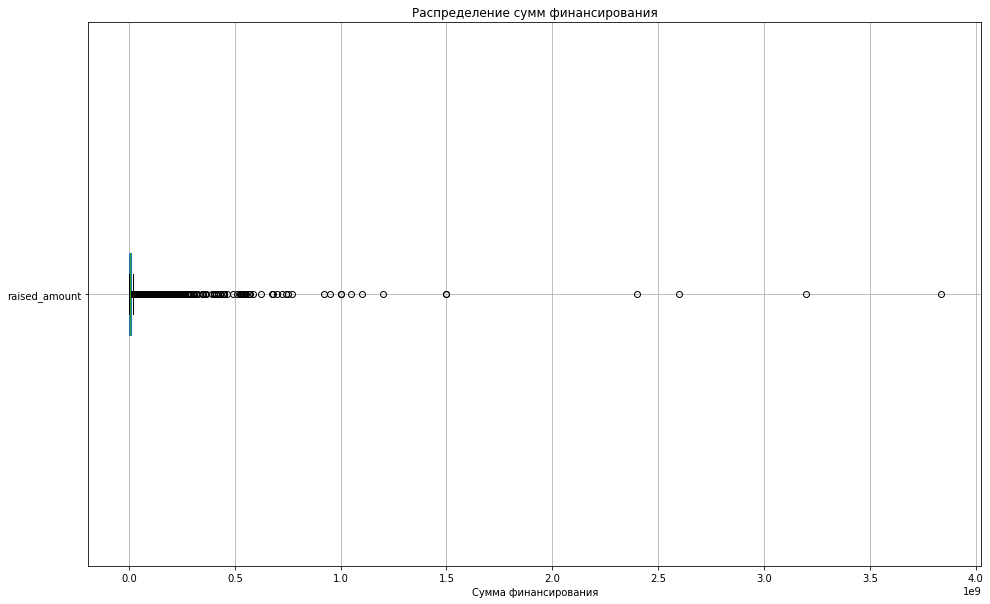

In [69]:
boxplot = df_company_and_rounds[df_company_and_rounds['raised_amount'] > 0].boxplot(
    column ='raised_amount',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение сумм финансирования')
boxplot.set_xlabel('Cумма финансирования')

plt.show()

In [70]:
# Возьмем диапозон raised_amount до 100000000, чтобы подробнее рассмотреть ящик

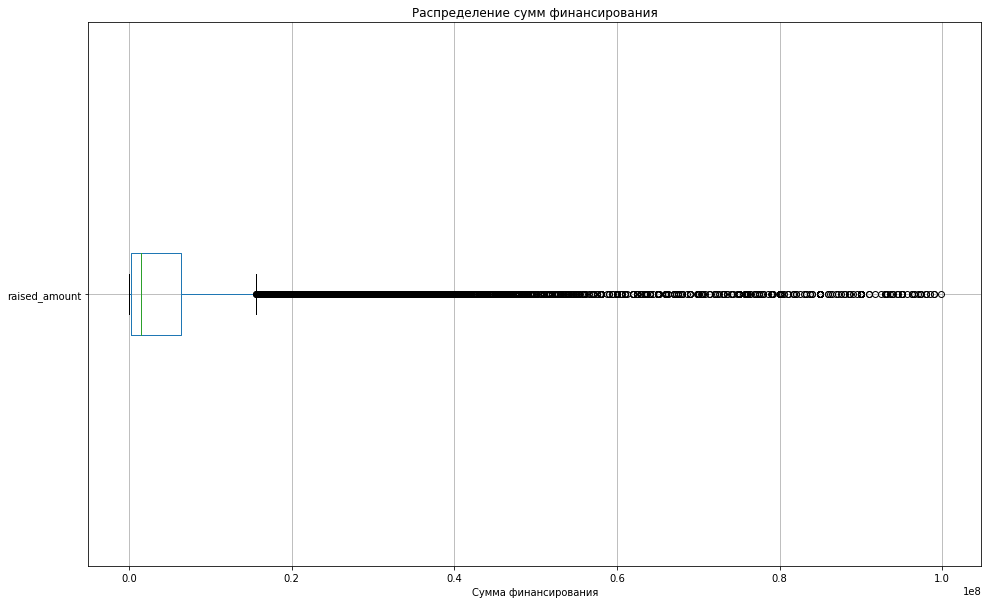

In [71]:
boxplot = df_company_and_rounds[df_company_and_rounds['raised_amount'] < 10**8].boxplot(
    column ='raised_amount',
    vert = False, 
    figsize = (16, 10))

boxplot.set_title('Распределение сумм финансирования')
boxplot.set_xlabel('Cумма финансирования')

plt.show()

- Для оценки типичного размера средств, выделяемых в рамках одного раунда, выведем медианное значение, так как на плоте видно большое кол-во выбросов, что может исказить итоговый результат.

In [72]:
# Составим сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года вычислим:
# типичный размер средств, выделяемый в рамках одного раунда;
# общее количество раундов финансирования за этот год

In [73]:
df_year_grouped = df_company_and_rounds.groupby('funded_at_year')['raised_amount'].agg(['median', 'count'])

In [74]:
# Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования

In [75]:
df_year_filtered = df_year_grouped[df_year_grouped['count'] > 50].sort_values(by = 'count', ascending = False)
display(df_year_filtered)

,median,count
funded_at_year,,
2013.0,1200000.0,11042
2012.0,1000000.0,9956
2011.0,1200000.0,9162
2010.0,1625290.0,6194
2009.0,2000000.0,4112
2008.0,3152000.0,3735
2007.0,4000000.0,3220
2006.0,5000000.0,2409
2005.0,5500000.0,1624


In [76]:
# Построим столбчатую диаграмму, которая будет отражать динамику по годам для типичного размера средств, 
# которые стартапы получали в рамках одного раунда финансирования

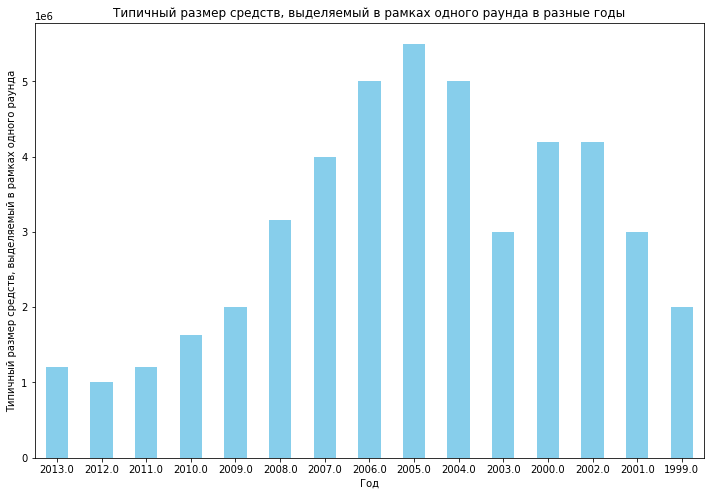

In [77]:
df_year_filtered['median'].plot(kind = 'bar',
                                color = 'skyblue',
                                legend = False,
                                figsize = (12, 8))

plt.title('Типичный размер средств, выделяемый в рамках одного раунда в разные годы')
plt.ylabel('Типичный размер средств, выделяемый в рамках одного раунда')
plt.xlabel('Год')
plt.xticks(rotation = 0)
plt.show()

In [78]:
# Построим столбчатую диаграмму, которая будет отражать динамику по годам для количества раундов, 
# которые получали стартапы  

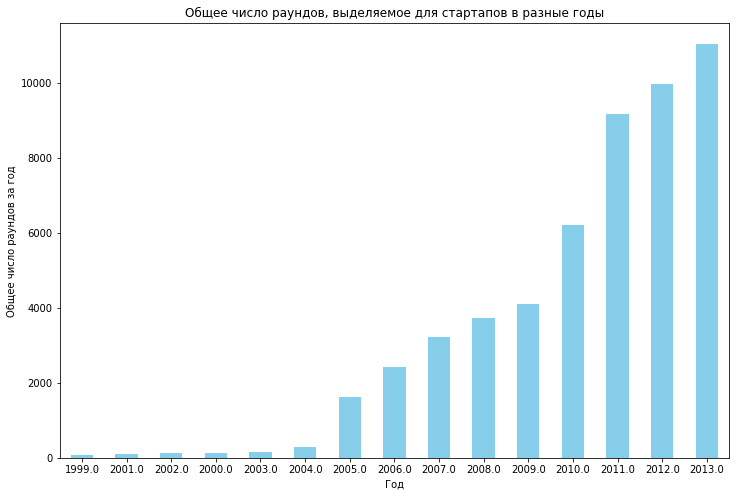

In [79]:
df_year_filtered.sort_values(by = 'count')['count'].plot(kind = 'bar',
                               color = 'skyblue',
                               legend = False,
                               figsize = (12, 8))

plt.title('Общее число раундов, выделяемое для стартапов в разные годы')
plt.ylabel('Общее число раундов за год')
plt.xlabel('Год')
plt.xticks(rotation = 0)
plt.show()

In [80]:
# Для исследования данных за 2013 год выделим из датафрейма df_company_and_rounds_with_year строки, где год инвестиции - 2013

In [81]:
df_company_and_rounds_2013 = df_company_and_rounds[df_company_and_rounds['funded_at_year'] == 2013]

local_max = df_company_and_rounds_2013['funded_at_year'].max()
local_min = df_company_and_rounds_2013['funded_at_year'].min()

print(f'Максимальное значение в столбце funded_at_year: {local_max}, минимальное: {local_min}')

Максимальное значение в столбце funded_at_year: 2013.0, минимальное: 2013.0


In [82]:
# Добавим столбец funded_at_quarter, в которой на основании столбца funded_at выделим квартал финансирования 
# в рамках 2013 года

In [83]:
df_company_and_rounds_2013['funded_at_quarter'] = df_company_and_rounds_2013['funded_at'].dt.quarter

/tmp/ipykernel_117/519885162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company_and_rounds_2013['funded_at_quarter'] = df_company_and_rounds_2013['funded_at'].dt.quarter


In [84]:
# Изучим результат преобразований

In [85]:
display(df_company_and_rounds_2013.head())
df_company_and_rounds_2013.info()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year,funded_at_quarter
24,10015.0,Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.0,...,10015.0,2013-08-13,series-c+,43000000.0,0.0,5.0,1.0,0.0,2013.0,3
34,10018.0,Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.0,...,10018.0,2013-03-28,series-c+,15000000.0,0.0,6.0,1.0,0.0,2013.0,1
50,100243.0,DeepFlex,manufacturing,operating,2004-01-01,NaT,deepflex.com,NaN,USA,0.0,...,100243.0,2013-04-08,venture,0.0,0.0,5.0,1.0,0.0,2013.0,2
177,101094.0,Rev Worldwide,ecommerce,operating,2008-01-01,NaT,revworldwide.com,revworldwide,USA,0.0,...,101094.0,2013-02-01,series-c+,0.0,0.0,1.0,0.0,1.0,2013.0,1
178,101094.0,Rev Worldwide,ecommerce,operating,2008-01-01,NaT,revworldwide.com,revworldwide,USA,0.0,...,101094.0,2013-12-08,other,4815940.0,0.0,0.0,1.0,0.0,2013.0,4


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11042 entries, 24 to 217386
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_ID           11042 non-null  float32       
 1   name                 11042 non-null  object        
 2   category_code        10720 non-null  object        
 3   status               11042 non-null  object        
 4   founded_at           9268 non-null   datetime64[ns]
 5   closed_at            36 non-null     datetime64[ns]
 6   domain               10733 non-null  object        
 7   network_username     7909 non-null   object        
 8   country_code         10539 non-null  object        
 9   investment_rounds    11042 non-null  float32       
 10  funding_rounds       11042 non-null  float32       
 11  funding_total        11042 non-null  float32       
 12  milestones           11042 non-null  float32       
 13  funding_round_id     11042 no

In [86]:
# Составим сводную таблицу по кварталам 2013 года, в которой на основании столбца raised_amount вычислим:
# типичный размер средств, выделяемый в рамках одного квартала 2013 года;
# общее количество раундов финансирования за каждый квартал

In [87]:
df_year_grouped_2013 = df_company_and_rounds_2013.groupby('funded_at_quarter')['raised_amount'].agg(['median', 
                                                                                                     'count'])
display(df_year_grouped_2013)

,median,count
funded_at_quarter,,
1,800000.0,2626
2,1100000.0,2908
3,1286600.0,3052
4,1669680.0,2456


In [88]:
# Построим столбчатую диаграмму, которая будет отражать динамику распределения типичного размера средств,
# которые стартапы получали в рамках одного раунда финансирования по кварталам 2013 года

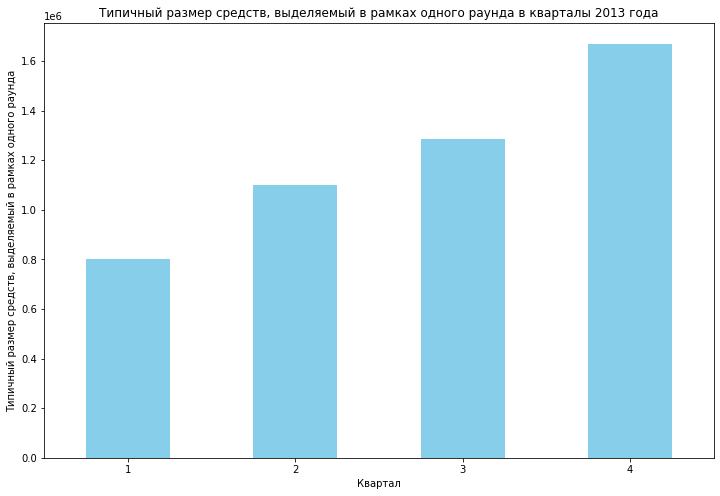

In [89]:
df_year_grouped_2013['median'].plot(kind = 'bar',
                                    color = 'skyblue',
                                    legend = False,
                                    figsize = (12, 8))

plt.title('Типичный размер средств, выделяемый в рамках одного раунда в кварталы 2013 года')
plt.ylabel('Типичный размер средств, выделяемый в рамках одного раунда')
plt.xlabel('Квартал')
plt.xticks(rotation = 0)
plt.show()

In [90]:
# Построим столбчатую диаграмму, которая будет отражать динамику для количества раундов по кварталам 2013 года 

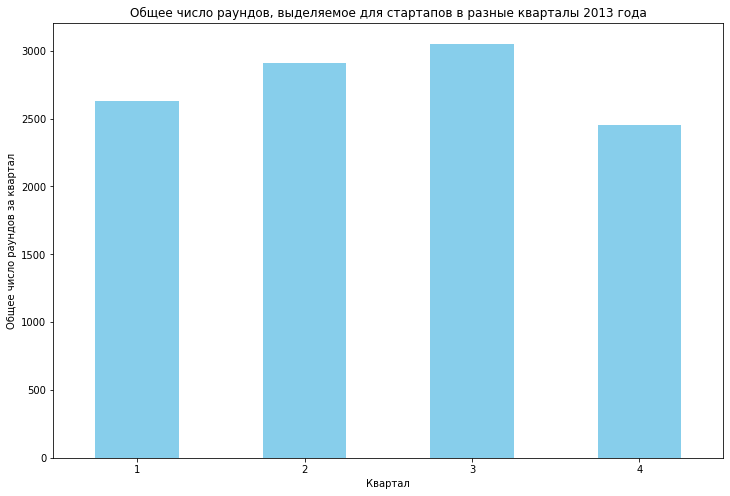

In [91]:
df_year_grouped_2013.sort_values(by = 'funded_at_quarter')['count'].plot(kind = 'bar',
                                                                         color = 'skyblue',
                                                                         legend = False,
                                                                         figsize = (12, 8))

plt.title('Общее число раундов, выделяемое для стартапов в разные кварталы 2013 года')
plt.ylabel('Общее число раундов за квартал')
plt.xlabel('Квартал')
plt.xticks(rotation = 0)
plt.show()

- Типичный размер собранных в рамках одного раунда средств был максимален в 2005 и составил 5500000.
- В рамках 2013 года наблюдается поквартальный рост типичного размера собранных в рамках одного раунда средств от 800000 в первом квартале  к 1669680 в четвертом. В случае общего числа кварталов с первого к третьему кварталу наблюдался рост - от 2626 раундов к 3052, а затем снидение в четвертом квартале до 2456.



### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. 
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

- Присоединим к датафрейму df_people датафрейм df_education, используя столбец id и person_id соотвественное, в
них представлены идентификаторы сотрудников, тип объединения будет left, чтобы сохранить все записи о компаниях и добавить к ним информацию о работниках

In [92]:
df_people_and_education = df_people.merge(df_education, how = 'left', left_on = 'id', right_on = 'person_id')

In [93]:
# Изучим объединенный датафрейм

In [94]:
display(df_people_and_education.head())
df_people_and_education.info()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,no data,2415.0,10.0,Harvard University,NaN
1,100,Peter,Lester,27.0,no data,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,no data,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,no data,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,-1.0,no data,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_x              267694 non-null  int32  
 1   first_name        267689 non-null  object 
 2   last_name         267693 non-null  object 
 3   company_id        267694 non-null  float32
 4   network_username  267694 non-null  object 
 5   id_y              109056 non-null  float64
 6   person_id         109056 non-null  float64
 7   instituition      109002 non-null  object 
 8   graduated_at      57691 non-null   object 
dtypes: float32(1), float64(2), int32(1), object(5)
memory usage: 18.4+ MB


In [95]:
# В датафрейме два столбца id_x и id_y соотвествующие идентификатору сотрудника и идентификатору записи 
# об образовании, переименуем их для большей ясности, так же переименуем столбец person_id	

In [96]:
df_people_and_education = df_people_and_education.rename(columns = {
    'id_x' : 'id_for_person_in_company',
    'id_y' : 'education_id',
    'person_id' : 'id_for_person_in_education'
})

In [97]:
# Изучим результат преобразований

In [98]:
display(df_people_and_education.head())
df_people_and_education.info()

,id_for_person_in_company,first_name,last_name,company_id,network_username,education_id,id_for_person_in_education,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,no data,2415.0,10.0,Harvard University,NaN
1,100,Peter,Lester,27.0,no data,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,no data,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,no data,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,-1.0,no data,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_for_person_in_company    267694 non-null  int32  
 1   first_name                  267689 non-null  object 
 2   last_name                   267693 non-null  object 
 3   company_id                  267694 non-null  float32
 4   network_username            267694 non-null  object 
 5   education_id                109056 non-null  float64
 6   id_for_person_in_education  109056 non-null  float64
 7   instituition                109002 non-null  object 
 8   graduated_at                57691 non-null   object 
dtypes: float32(1), float64(2), int32(1), object(5)
memory usage: 18.4+ MB


In [99]:
# Сгруппируем данные по столбцу company_id и подсчитаем число непустых строк для работников, у которых указана 
# компания, и число непустых строк для работников, у которых указано образование. 
# Выведем первые пять строк полученного датафрейма

In [100]:
count_of_people = df_people_and_education.groupby('company_id').agg({'id_for_person_in_company' : 'nunique',
                                                                     'id_for_person_in_education' : 'nunique'})

display(count_of_people.head())

,id_for_person_in_company,id_for_person_in_education
company_id,,
-1.0,192094,49607
1.0,2,1
2.0,1,1
3.0,3,2
4.0,13,12


In [101]:
# Удалим строку для company_id -1, это компании, у которых изначально не было id и отсортируем датафрейм по 
# значениям id_for_person_in_company
# Выведем первые пять строк полученного датафрейма

In [102]:
count_of_people.drop(axis = 0, index = [-1], inplace = True)

display(count_of_people.head())

,id_for_person_in_company,id_for_person_in_education
company_id,,
1.0,2,1
2.0,1,1
3.0,3,2
4.0,13,12
5.0,61,45


Сгруппируем count_of_people по количеству людей в компании и посчитаем количество компаний в каждой группировке

In [103]:
# Вычислим минимальное и максимальное количество сотрудников в компаниях, а также размах ряда значений

In [104]:
local_max = count_of_people['id_for_person_in_company'].max()
local_min = count_of_people['id_for_person_in_company'].min()
local_scope = local_max - local_min

print(f'Минимальное количество сотрудников в компании: {local_min}, максимальное: {local_max}, размах: {local_scope}')

Минимальное количество сотрудников в компании: 1, максимальное: 244, размах: 243


In [105]:
# Построим и изучим диаграмму размаха, чтобы подобрать оптимальные диапозоны для категоризации компаний 
# по количеству сотрудников

Text(0.5, 0, 'Количество сотрудников в компании')

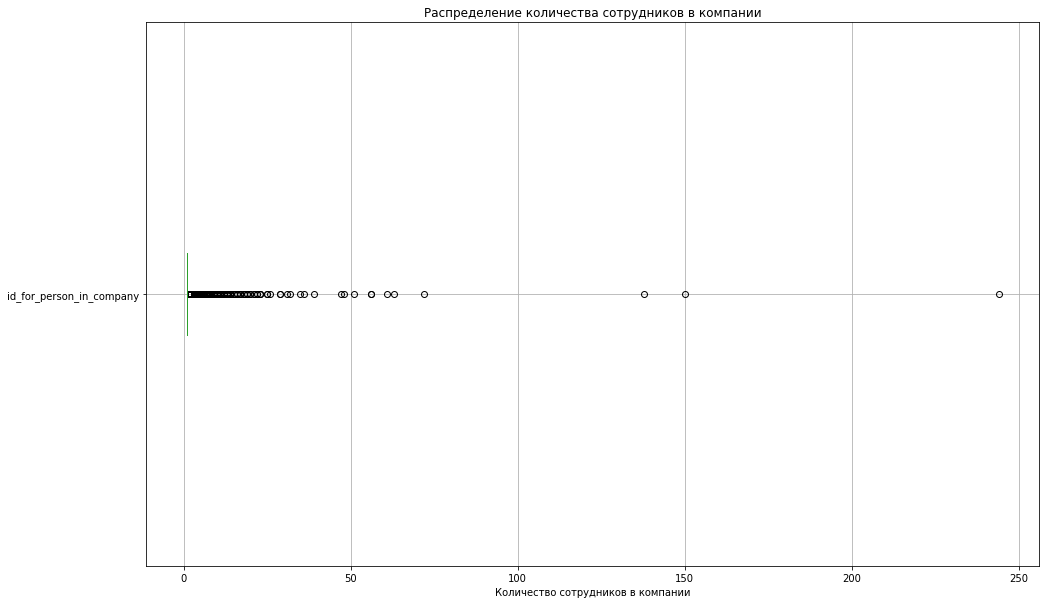

In [106]:
boxplot = count_of_people.boxplot(column = 'id_for_person_in_company',
                                  vert = False, 
                                  figsize = (16, 10))

boxplot.set_title('Распределение количества сотрудников в компании')
boxplot.set_xlabel('Количество сотрудников в компании')

In [107]:
# Построим и изучим диаграмму размаха для значений id_for_person_in_company меньше 100, 
# чтобы подробнее изучить распределние данных в областях малых значений

Text(0.5, 0, 'Количество сотрудников в компании')

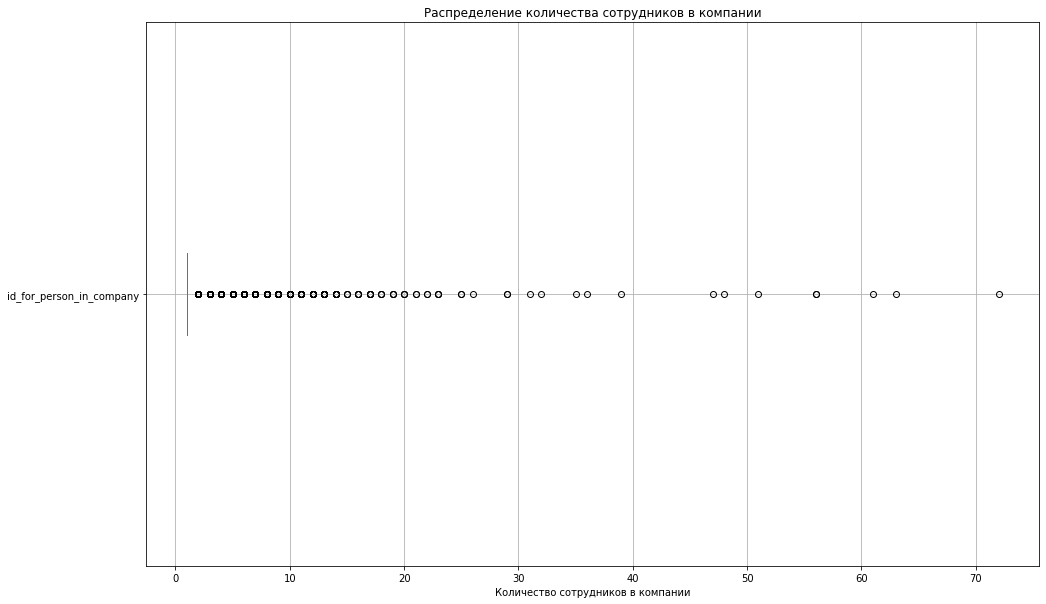

In [108]:
boxplot = count_of_people[count_of_people['id_for_person_in_company'] < 100].boxplot(column = 'id_for_person_in_company',
                                  vert = False, 
                                  figsize = (16, 10))

boxplot.set_title('Распределение количества сотрудников в компании')
boxplot.set_xlabel('Количество сотрудников в компании')

- Сгруппируем count_of_people по количеству людей в компании и посчитаем количество компаний в каждой группировке

In [109]:
category_by_count_of_people = count_of_people['id_for_person_in_company'].value_counts()

display(category_by_count_of_people)

1      18117
2       2709
3        921
4        450
5        237
6        138
7        100
8         59
9         46
11        30
10        25
13        17
12        16
14         8
17         5
16         4
23         3
15         3
20         3
18         3
19         3
21         2
22         2
56         2
25         2
29         2
35         1
47         1
31         1
48         1
61         1
51         1
138        1
26         1
244        1
72         1
36         1
39         1
32         1
150        1
63         1
Name: id_for_person_in_company, dtype: int64

- В предыдщей иттерации категории с компаниями, имеющими более 40 сотрудниковно, но менее 100 и более 100 сотрудников, показали схожие данные, объединим их в один диапозон. Оставим компании с числом сотрудников менее 40 для более подробного изучения.

In [110]:
count_of_people_less_40 = count_of_people[count_of_people['id_for_person_in_company'] < 40]
category_by_count_of_people = count_of_people_less_40['id_for_person_in_company'].value_counts()

display(category_by_count_of_people)

1     18117
2      2709
3       921
4       450
5       237
6       138
7       100
8        59
9        46
11       30
10       25
13       17
12       16
14        8
17        5
16        4
20        3
15        3
23        3
19        3
18        3
29        2
22        2
25        2
21        2
26        1
39        1
32        1
36        1
35        1
31        1
Name: id_for_person_in_company, dtype: int64

 Определим следующие категории для компаний:
  - 1 сотрудник - категория 1,
  - 2 сотрудника - категория 2,
  - 3 сотрудника - категория 3,
  - 6-10 сотрудников - категория 6-10,
  - 11-25 сотрудников - категория 11-25,
  - более 26 сотрудников - категория 26
  
  Такой выбор границ связан с тем, для стартапа 26+ сотрудников в компании - это уже крупный стартап, а стартапы с одним человеком к компании представлены самым большим числом, что тоже абсолютно логично для стартапа, ледуюшие категории и шаги так же вырисовываются из category_by_count_of_people.

In [111]:
# Напишем функцию range_for_company для категоризации компаний

In [112]:
def range_for_company(count):
    if count == 1:
        return "1"
    elif count == 2:
        return "2"
    elif count == 3:
        return "3"
    elif (count > 3) & (count <= 5):
        return "3-5"
    elif (count > 5) & (count <= 10):
        return "6-10"
    elif (count > 10) & (count <= 25):
        return "11-25"
    else:
        return "26+"

In [113]:
# Применим функцию range_for_company к столбцу 'id_for_person_in_company'
# Сохраним присвоеные категории в новый столбец range и выведем первые 30 строк для изучения полученного датафрейма

In [114]:
count_of_people['range'] =  count_of_people['id_for_person_in_company'].apply(range_for_company)

display(count_of_people.head(30))

,id_for_person_in_company,id_for_person_in_education,range
company_id,,,
1.0,2,1,2
2.0,1,1,1
3.0,3,2,3
4.0,13,12,11-25
5.0,61,45,26+
8.0,3,0,3
9.0,1,1,1
10.0,2,1,2
11.0,5,4,3-5


In [115]:
# Создадим новый столбец, в который поместим долю сотрудников в компании, для которых нет информации об образовании

In [116]:
count_of_people['share_na'] = round(
    (count_of_people['id_for_person_in_company'] 
     - count_of_people['id_for_person_in_education'])/count_of_people['id_for_person_in_company'] * 100, 2)

display(count_of_people.head())

,id_for_person_in_company,id_for_person_in_education,range,share_na
company_id,,,,
1.0,2,1,2,50.00
2.0,1,1,1,0.00
3.0,3,2,3,33.33
4.0,13,12,11-25,7.69
5.0,61,45,26+,26.23


In [117]:
# Сгруппируем данные по категориям, характеризующим величину компании
# Оценим среднюю долю сотрудников без информации об образовании в каждой из групп

In [118]:
df_range = count_of_people.groupby('range').agg({'share_na' : 'mean'})
df_range = round(df_range, 2)
display(df_range)

,share_na
range,
1,46.26
11-25,45.88
2,46.60
26+,26.55
3,48.68
3-5,49.73
6-10,53.18


In [119]:
# Переупорядочиваем датафрейм в порядке возрастания категорий

In [120]:
order = ['1', '2', '3', '3-5', '6-10', '11-25', '26+']
df_range_ordered = df_range.reindex(order)

In [121]:
# Построим диаграмму распределения средней доли сотрудников без информации об образовании по категориям компаний

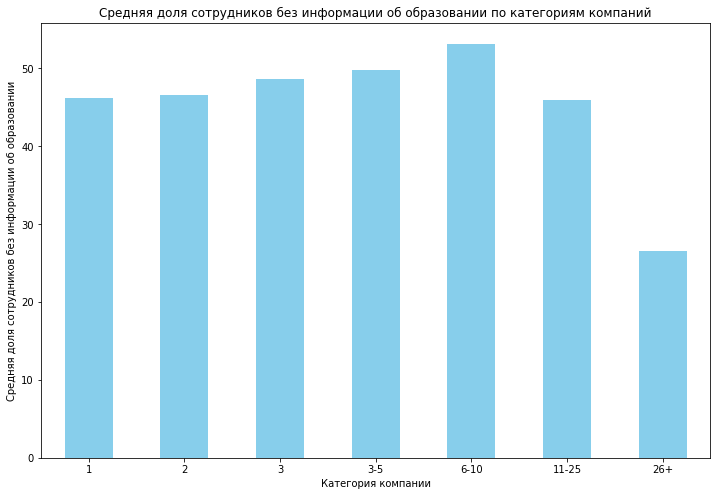

In [122]:
df_range_ordered['share_na'].plot(kind = 'bar',
                          color = 'skyblue',
                          legend = False,
                          figsize = (12, 8))

plt.title('Средняя доля сотрудников без информации об образовании по категориям компаний')
plt.ylabel('Средняя доля сотрудников без информации об образовании')
plt.xlabel('Категория компании')
plt.xticks(rotation = 0)
plt.show()

- Самая высокая средняя доля сотрудников без информации об образовании сотрудников в компаниях с 6-10 сотрудниками - 53.18%, самая низкая в компаниях, где более 25 сотрудников - 26.55%. Это может быть связано с тем, что стартапам, перешагнувшим 5 человек нужны люди, которые не имеют образования для некоторой операционной деятельности, не требующей специального образования. По мере роста стартапа вновь повышается число квалифицированных сотрудников и больше внимания уделяется организационным моментам - предоставлению информации о сотрудниках в том числе.
- Обратим внимание, что столбец `person_id` в `df_education` и `object_id` в `df_degrees` хранят одинаковую информацию, но в датафрейме `df_degrees` перед числовым значением добавлены символы `p:`. Если удалить лишние символы, то можно будет объединить эти два датафрейма по соотвествующим столбцам.
- Более того, изначально эти два датафрейма имели одинаковое количество строк - 109610 (после удаления пропусков значения немного расходятся: `df_education` - 109555 строк и `df_degrees`- 109610).
- Так же оба эти датафрйема можно объединить с датафейром `df_people` по индексу `id`, так как в нем также хранится идентификатор работника.  

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

- Исходя из описания данных `network_username` датафрейма `df_company_and_rounds` содержит ник компании в сети, а `network_username` датафрейма `df_people` ник сотрудника в социальных сетях. На первый взгляд столбец `network_username` нельзя использовать для объединения этих двух датафреймов.
- Проведем дополнительное исследование, посчитаем количество совпадающих значений в `network_username` датафрейма `df_company_and_rounds` и `network_username` датафрейма `df_people`.

In [123]:
 # Выведем диаграмму, Венна, чтобы визуально оценить перечение 'network_username' в двух таблицах

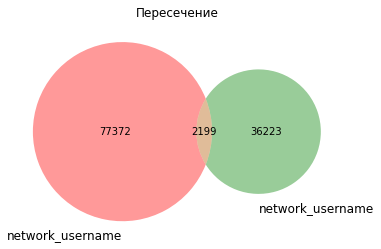

In [124]:
first_id = set(df_company_and_rounds['network_username'].dropna().unique())
second_id = set(df_people['network_username'].dropna().unique())

# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('network_username', 'network_username'))

# Отображаем график
plt.title("Пересечение")
plt.show() 

- Для этого задания удалим строки с пропусками в столбцах 'network_username'

In [125]:
df_company_and_rounds_without_na = df_company_and_rounds.dropna(subset = ['network_username'])
df_people_without_na = df_people.dropna(subset = ['network_username'])

In [126]:
# Проверим результат

In [127]:
df_company_and_rounds_without_na.info()
df_people_without_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95534 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_ID           95534 non-null  float32       
 1   name                 95534 non-null  object        
 2   category_code        92421 non-null  object        
 3   status               95534 non-null  object        
 4   founded_at           78741 non-null  datetime64[ns]
 5   closed_at            1431 non-null   datetime64[ns]
 6   domain               95010 non-null  object        
 7   network_username     95534 non-null  object        
 8   country_code         69847 non-null  object        
 9   investment_rounds    95534 non-null  float32       
 10  funding_rounds       95534 non-null  float32       
 11  funding_total        95534 non-null  float32       
 12  milestones           95534 non-null  float32       
 13  funding_round_id     34013 non

- Создадим список уникальных значений `network_username` в датайфреймах `df_company_and_rounds_without_na` и `df_people_without_na`

In [128]:
inuque_company_and_rounds = list(set(df_company_and_rounds_without_na['network_username']))
inuque_people = list(set(df_people_without_na['network_username']))

- Вычислим длину списков уникальных значений `network_username` в датайфреймах `df_company_and_rounds_without_na` и `df_people_without_na`

In [129]:
count_inuque_company_and_rounds = len(inuque_company_and_rounds)
count_inuque_people = len(inuque_people)

print(f'Число уникальных значений network_username в df_company_and_rounds: {count_inuque_company_and_rounds}')
print(f'Число уникальных значений network_username в df_people: {count_inuque_people}')

Число уникальных значений network_username в df_company_and_rounds: 79571
Число уникальных значений network_username в df_people: 38422


In [130]:
# Создаем список пересечений элементов в двух списках

In [131]:
list_of_intersections = set(inuque_company_and_rounds).intersection(inuque_people)
count_of_intersections = len(list_of_intersections)

print(f'Число пересечений в столбцах network_username датафреймов df_company_and_rounds и df_people: {count_of_intersections}')

Число пересечений в столбцах network_username датафреймов df_company_and_rounds и df_people: 2199


In [132]:
# Посчитаем долю дубликатов от всех строк для каждого датафрйема

In [133]:
intersections_share_in_company_and_rounds = round(
    count_of_intersections/count_inuque_company_and_rounds*100, 2
)
intersections_share_in_people = round(count_of_intersections/count_inuque_people*100, 2)

print(f'Доля дубликатов в столбце network_username в датафрейме df_company_and_rounds составляет {intersections_share_in_company_and_rounds}%')
print(f'Доля дубликатов в столбце network_username в датафрейме df_people составляет {intersections_share_in_people}%')

Доля дубликатов в столбце network_username в датафрейме df_company_and_rounds составляет 2.76%
Доля дубликатов в столбце network_username в датафрейме df_people составляет 5.72%


- Число совпадений в столбцах network_username в двух таблицах равно 2199, что составляет 2.76% от всех непустых строк датафрейма df_company_and_rounds и 5.72% от всех непустых строк датафрейма df_people. Это слишком низкий процент совпадений, чтобы использовать столбец network_username для объединения данных.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [134]:
# Изучим датафрейме `df_company_and_rounds` еще раз.

In [135]:
display(df_company_and_rounds.head(10))
df_company_and_rounds.info()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10002.0,Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10003.0,Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100042.0,HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

- Удалим ранее добавленный столбце `funded_at_year`.
- Первое, что бросается в глаза - в датафрейме `df_company_and_rounds` содерит столбцы `founded at` и `funded at`, представленные в описании как дата инвестирования и дата финансирования, при этом для рада столбцов эти даты не совпадают. Можно предположить, что `founded at` - дата первого раунда инвестирования, а `funded at` дата конкретного раунда финансирования. 
- Так же есть два столбца с одинаковыми названиями: `company_ID` и `company_id`, которые оба содержат идентификаторы компаний. Если изучить столбцы до `company_id` и после, можно предположить, что изначально было два файла, один из которых содержал информацию о команиях, а второй о раундах инвестирования, которые склеили между собой, а не объеднили.
- Разделим датафрейм `df_company_and_rounds` на два датафрейма - `df_company` и `df_rounds` - по столбцу `company_id`, переименуем столбец `company_ID` на `company_id` и объединим их методом `merge`, используя тип объединения `outer`, чтобы максимальным образом сохранить данные.

In [136]:
# Удалим ранее добавленный столбце `funded_at_year`

In [137]:
df_company_and_rounds = df_company_and_rounds.iloc[:, :22]

In [138]:
# Разделим df_company_and_rounds на два датафрейма - df_company и df_rounds - по столбцу company_id

In [139]:
df_company = df_company_and_rounds.iloc[:, :14]
df_rounds = df_company_and_rounds.iloc[:, 14:]

In [140]:
# Проверим полученный результат

In [141]:
display(df_company.head())
df_company.info()

display(df_rounds.head())
df_rounds.info()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float32       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float32       
 10  funding_rounds     217472 non-null  float32       
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  float32       
 13  funding_round_id   52626 non-null   float32 

,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52626 non-null  float32       
 1   funded_at            52382 non-null  datetime64[ns]
 2   funding_round_type   52626 non-null  object        
 3   raised_amount        52626 non-null  float32       
 4   pre_money_valuation  52626 non-null  float32       
 5   participants         52626 non-null  float32       
 6   is_first_round       52626 non-null  float32       
 7   is_last_round        52626 non-null  float32       
dtypes: datetime64[ns](1), float32(6), object(1)
memory usage: 18.0+ MB


In [142]:
# Переименуем столбец company_ID в датафрейме df_company на company_id

In [143]:
df_company = df_company.rename(columns = {'company_ID' : 'company_id'})

df_company.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id'],
      dtype='object')

In [144]:
# Вычислим число уникальных названий компаний в таблице df_company 

In [145]:
nunique_company = df_company['company_id'].nunique() 

print(f'Число уникальных наименований компаний в таблице df_company: {nunique_company}')

Число уникальных наименований компаний в таблице df_company: 196553


- Число строк в таблице df_company 217472, а число уникальных наименований компаний 196553. Пропусков в строке Попробуем удалить дубликаты в столбце 'company_id'.

In [146]:
df_company_no_duplicates = df_company.drop_duplicates(subset = ['company_id'], keep = 'first')

final_row_count = df_company_no_duplicates.shape[0]

print(f'Число строк после удаления дубликатов: {final_row_count}')

Число строк после удаления дубликатов: 196553


In [147]:
# Исследуем таблицу df_company_no_duplicates

In [148]:
df_company_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float32       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float32       
 10  funding_rounds     196553 non-null  float32       
 11  funding_total      196553 non-null  float32       
 12  milestones         196553 non-null  float32       
 13  funding_round_id   31707 non-null   float32 

- Удалим столбцы `founded_at`, `closed_at`, `domain`, `network_username`, `country_code`, `milestones`, `funding_round_id` которые не потребуются для дальнейшего анализа

In [149]:
df_company_drop = df_company_no_duplicates.drop(df_company_no_duplicates.columns[
    [5, 6, 7, 8, 12, 13]], axis=1)
df_company_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float32       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   investment_rounds  196553 non-null  float32       
 6   funding_rounds     196553 non-null  float32       
 7   funding_total      196553 non-null  float32       
dtypes: datetime64[ns](1), float32(4), object(3)
memory usage: 10.5+ MB


In [150]:
# Сбросим индексы

In [151]:
df_company_final = df_company_drop.reset_index()

df_company_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              196553 non-null  int64         
 1   company_id         196553 non-null  float32       
 2   name               196553 non-null  object        
 3   category_code      123186 non-null  object        
 4   status             196553 non-null  object        
 5   founded_at         91227 non-null   datetime64[ns]
 6   investment_rounds  196553 non-null  float32       
 7   funding_rounds     196553 non-null  float32       
 8   funding_total      196553 non-null  float32       
dtypes: datetime64[ns](1), float32(4), int64(1), object(3)
memory usage: 10.5+ MB


- Обработанный датафрейм `df_company_final` содержит 196553 строки, вместо 217472 строк в `df_company_and_rounds`, предварительно можем сказать, что данные сохранены полно, потому что были удалены дубликаты в столбце `company_ID`.
- Каждая компания встречается в таблице только один раз, поэтому в дальнейшем с ней будет удобно работать для оценки инвестиционной истории компании.
- Также все названия столбцов `df_company_final` приведены к snake case.


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. 

In [152]:
# Отфильтруем данные по столбцам funding_rounds, investment_rounds, acquired

In [153]:
company_second_part = df_company_final[(df_company_final['funding_rounds'] > 0) |
                                       (df_company_final['investment_rounds'] > 0) |
                                      (df_company_final['status'] == 'acquired')]

In [154]:
# сбросим индексы и удалим столбцы level_0 и index с индексами

In [155]:
company_second_part = company_second_part.reset_index()

del company_second_part['level_0']
del company_second_part['index']

In [156]:
# Изучим полученную таблицу

In [157]:
display(company_second_part.head())
company_second_part.info()

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,0.0,3.0,39750000.0
1,10.0,Flektor,games_video,acquired,NaT,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,0.0,0.0,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,0.0,1.0,5000000.0
4,10014.0,Mobclix,mobile,acquired,2008-03-01,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float32       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   investment_rounds  40747 non-null  float32       
 6   funding_rounds     40747 non-null  float32       
 7   funding_total      40747 non-null  float32       
dtypes: datetime64[ns](1), float32(4), object(3)
memory usage: 1.9+ MB


Получившася таблица `company_second_part` содержит 40747 строку, что соответствует условию: в результирующей таблице должно получиться порядка 40 тысяч компаний. Предобработку таблицы провели верно, можно переходить к анализу выбросов.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [158]:
# Построим график распределения общих сумм финансирования

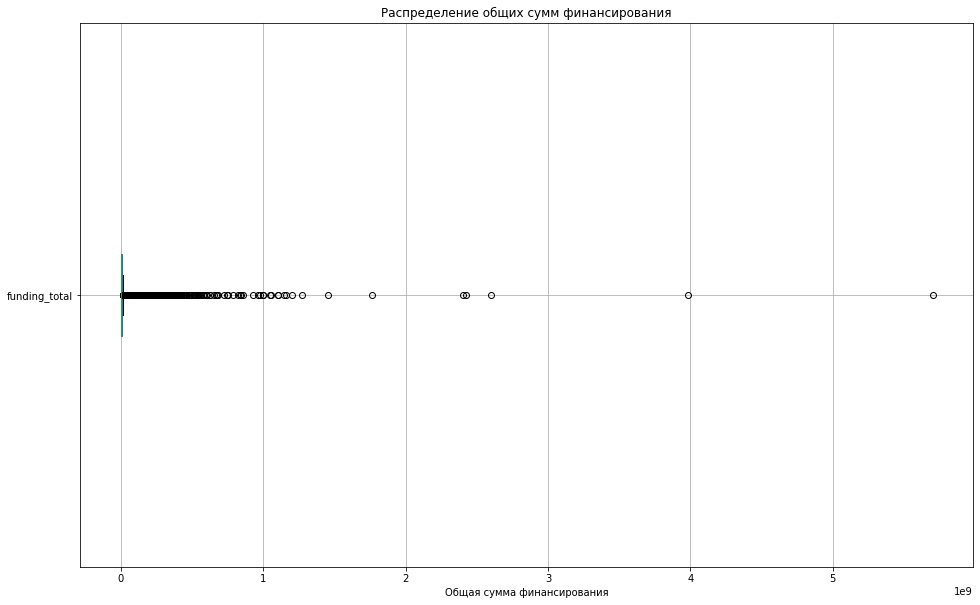

In [159]:
boxplot = company_second_part.boxplot(
    column ='funding_total',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение общих сумм финансирования')
boxplot.set_xlabel('Общая сумма финансирования')

plt.show()

- Выделим область funding_total < 10**8, чтобы рассмотреть ящик

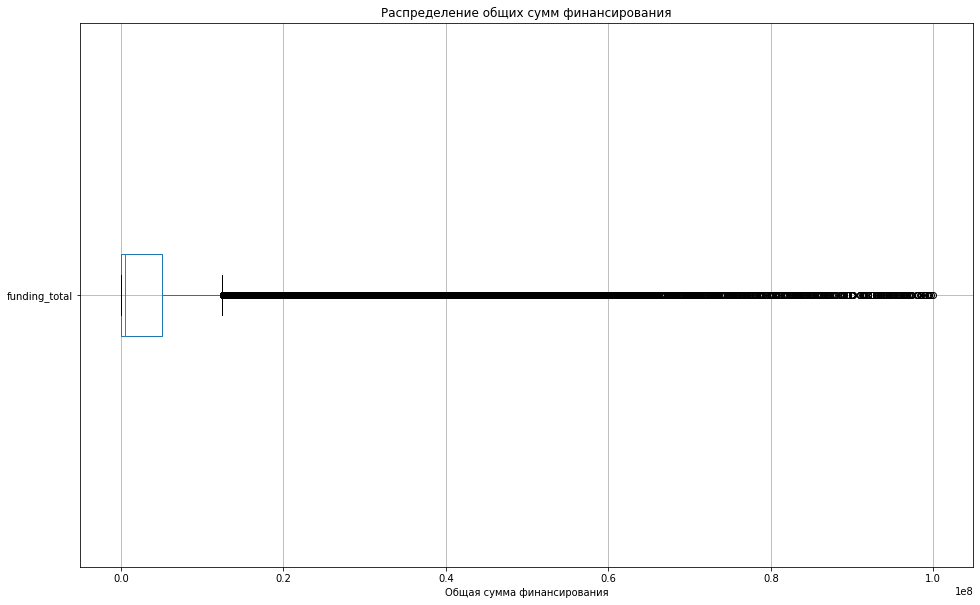

In [160]:
boxplot = company_second_part[company_second_part['funding_total'] < 10**8].boxplot(
    column = 'funding_total',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение общих сумм финансирования')
boxplot.set_xlabel('Общая сумма финансирования')

plt.show()

- Видим, что практически все величины попадают в область выбросов за третий персентиль 

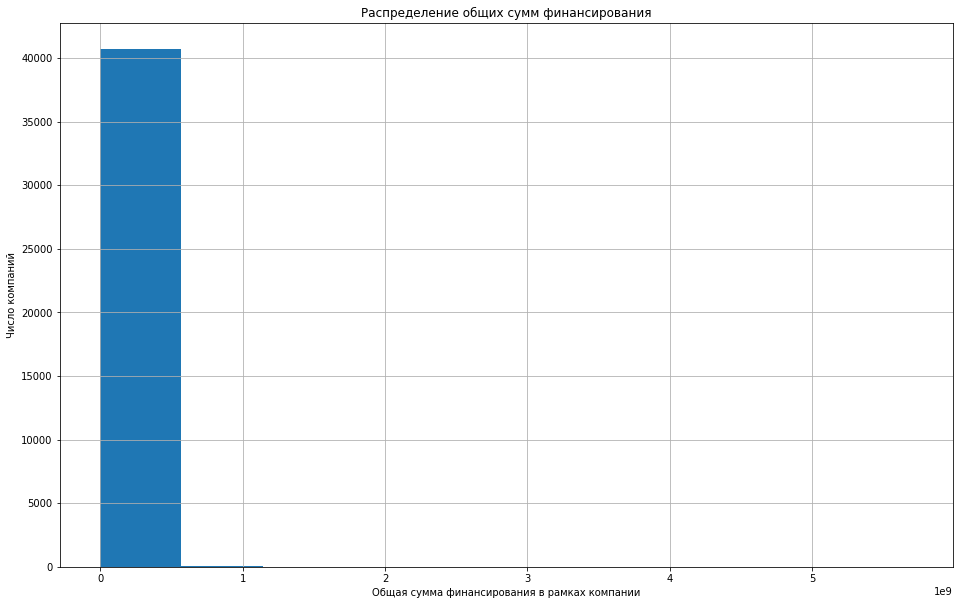

In [161]:
company_second_part['funding_total'].hist(figsize = (16, 10))

plt.title('Распределение общих сумм финансирования')
plt.xlabel('Общая сумма финансирования в рамках компании')
plt.ylabel('Число компаний')

plt.show()

In [162]:
# Изучим статистические характеристики таблицы company_second_part

In [163]:
company_second_part[['investment_rounds', 'funding_rounds', 'funding_total']].describe()

,investment_rounds,funding_rounds,funding_total
count,40747.000000,40747.000000,4.074700e+04
mean,0.150833,1.291531,1.013561e+07
std,3.123291,1.264604,5.646436e+07
min,0.000000,0.000000,0.000000e+00
25%,0.000000,1.000000,0.000000e+00
50%,0.000000,1.000000,6.000000e+05
75%,0.000000,2.000000,5.650650e+06
max,478.000000,15.000000,5.700000e+09


 - Среднее `funding_total` равне 10135670, что сильно отличается от медианы 600000, то есть для расчета типичного общего финансирования для одной компании брать среднее будет некорректно.
 - Видим, что первый квартиль `funding_total` равен нулю, третий квартиль 5650650, при этом все заметные точки лежат за ним в области выбросов.
- Так как мы не фильтровали по положительной общей сумме инвестиций, в нашу таблицу вошли компнаии, которые еще не получали инвестиций. 
- Выделим таблицу company_second_part_test, в которую войдут компании с 'funding_total' > 0.

In [164]:
company_second_part_test = company_second_part[(company_second_part['funding_total'] > 0)]

In [165]:
# Изучим статистические характеристики таблицы company_second_part_test

In [166]:
company_second_part_test[['investment_rounds', 'funding_rounds', 'funding_total']].describe()

,investment_rounds,funding_rounds,funding_total
count,27874.000000,27874.000000,2.787400e+04
mean,0.065796,1.736852,1.481652e+07
std,3.543019,1.254916,6.775936e+07
min,0.000000,1.000000,2.910000e+02
25%,0.000000,1.000000,5.000000e+05
50%,0.000000,1.000000,2.564500e+06
75%,0.000000,2.000000,1.100000e+07
max,478.000000,15.000000,5.700000e+09


- В новой таблице среднее равно 13697991, медиана 2551000, значения различаются на порядок, для оценки типичного общего финансирования для одной компании будем брать медиану.
- Первый и третий квартиль теперь соотвественно 500000 и 11000000.
- Построим и изучим так же диаграмму размаха

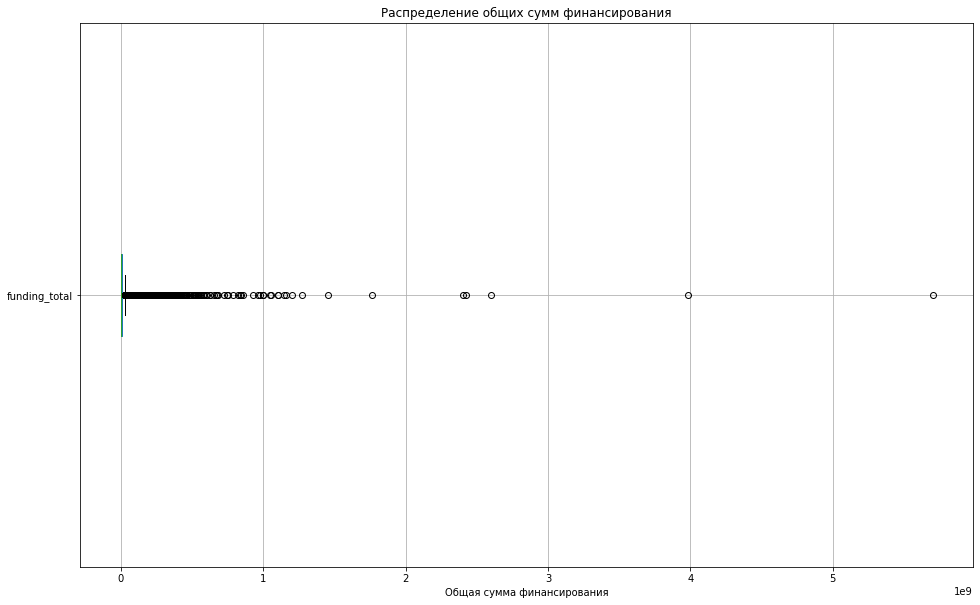

In [167]:
boxplot = company_second_part_test.boxplot(
    column ='funding_total',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение общих сумм финансирования')
boxplot.set_xlabel('Общая сумма финансирования')

plt.show()

- Уменьшим диапазон значений 'funding_total', который берем для диаграммы размаха, чтобы визуально выделить и определить границы выбросов.

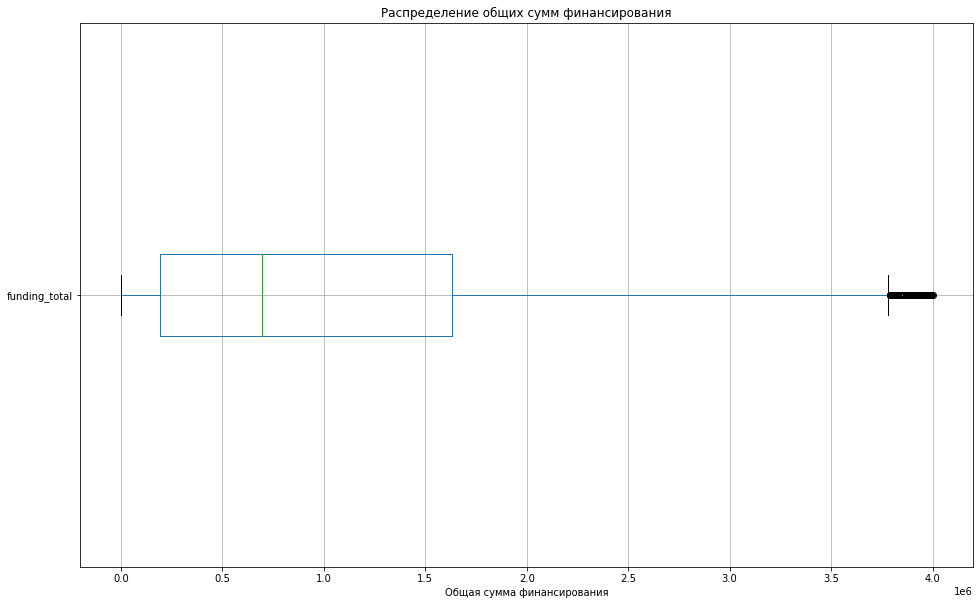

In [168]:
boxplot = company_second_part_test[company_second_part_test['funding_total'] < 4*10**6].boxplot(
    column ='funding_total',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение общих сумм финансирования')
boxplot.set_xlabel('Общая сумма финансирования')

plt.show()

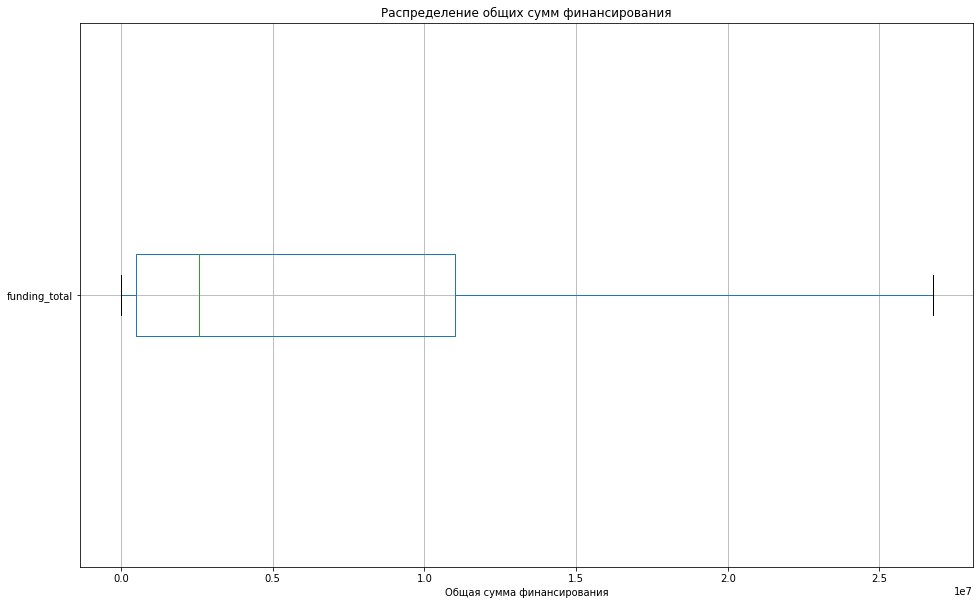

In [201]:
boxplot = company_second_part_test.boxplot(
    column ='funding_total',
    vert = False,  
    figsize = (16, 10), showfliers=False)

boxplot.set_title('Распределение общих сумм финансирования')
boxplot.set_xlabel('Общая сумма финансирования')

plt.show()

- Диапозон типичного общего финансирования для одной компании лежит в области от 0 до 3800000, значения вне этого промежутка будут выбивающимися.


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

- Объединим таблицу `df_acquisition` с таблицой `df_company_and_acquisition` - это таблица, которую выделили ранее с показателем `funding_total` больше нуля. Присоединять будем методом `right`, чтобы сохранить все компании из `df_company_and_acquisition`, которые были проданы, и поставить им данные из `company_second_part_test` для тех проданных компаний, для которых известны данные по самой компании.

In [170]:
df_company_and_acquisition = company_second_part_test.merge(df_acquisition, 
                                                            how = 'right', 
                                                            left_on = 'company_id', 
                                                            right_on = 'acquired_company_id')

In [171]:
# Изучим полученную таблицу

In [172]:
display(df_company_and_acquisition.head())
df_company_and_acquisition.info()

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,1,11,10,no data,20000000,2007-05-30
1,72.0,GrandCentral,mobile,acquired,2006-04-01,0.0,1.0,4000000.0,7,59,72,cash,60000000,2007-07-01
2,132.0,Last.fm,music,acquired,2002-01-01,0.0,1.0,5000000.0,8,24,132,cash,280000000,2007-05-01
3,155.0,FeedBurner,web,acquired,2004-02-01,0.0,2.0,8000000.0,9,59,155,cash,100000000,2007-06-01
4,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9407 entries, 0 to 9406
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            2349 non-null   float32       
 1   name                  2349 non-null   object        
 2   category_code         2255 non-null   object        
 3   status                2349 non-null   object        
 4   founded_at            1853 non-null   datetime64[ns]
 5   investment_rounds     2349 non-null   float32       
 6   funding_rounds        2349 non-null   float32       
 7   funding_total         2349 non-null   float32       
 8   id                    9407 non-null   int16         
 9   acquiring_company_id  9407 non-null   int32         
 10  acquired_company_id   9407 non-null   int32         
 11  term_code             9407 non-null   object        
 12  price_amount          9407 non-null   int64         
 13  acquired_at       

- Для объединенной таблицы видно значительное количество пропусков в первой части, судя по всему, далеко не для всех проданных компаний представлена информация о самой компании. Так как нам нужны компании у которых был ненулевой общий объём финансирования, удалим строки с пропусками в поле `funding_total`. 

In [173]:
df_company_and_acquisition_without_na = df_company_and_acquisition.dropna(subset = ['funding_total'])

display(df_company_and_acquisition_without_na.head())
df_company_and_acquisition_without_na.info()

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1,72.0,GrandCentral,mobile,acquired,2006-04-01,0.0,1.0,4000000.0,7,59,72,cash,60000000,2007-07-01
2,132.0,Last.fm,music,acquired,2002-01-01,0.0,1.0,5000000.0,8,24,132,cash,280000000,2007-05-01
3,155.0,FeedBurner,web,acquired,2004-02-01,0.0,2.0,8000000.0,9,59,155,cash,100000000,2007-06-01
7,314.0,Reddit,web,acquired,2005-01-01,0.0,1.0,100000.0,14,318,314,cash,0,2006-10-01
8,333.0,PayPal,finance,acquired,1998-12-01,6.0,5.0,197000000.0,15,20,333,stock,1500000000,2002-07-08


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2349 entries, 1 to 9406
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            2349 non-null   float32       
 1   name                  2349 non-null   object        
 2   category_code         2255 non-null   object        
 3   status                2349 non-null   object        
 4   founded_at            1853 non-null   datetime64[ns]
 5   investment_rounds     2349 non-null   float32       
 6   funding_rounds        2349 non-null   float32       
 7   funding_total         2349 non-null   float32       
 8   id                    2349 non-null   int16         
 9   acquiring_company_id  2349 non-null   int32         
 10  acquired_company_id   2349 non-null   int32         
 11  term_code             2349 non-null   object        
 12  price_amount          2349 non-null   int64         
 13  acquired_at       

In [174]:
df_company_cheap = df_company_and_acquisition_without_na[
    (df_company_and_acquisition_without_na['price_amount'] == 0) |
    (df_company_and_acquisition_without_na['price_amount'] == 1)]

display(df_company_cheap.head())
df_company_cheap.info()

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
7,314.0,Reddit,web,acquired,2005-01-01,0.0,1.0,100000.0,14,318,314,cash,0,2006-10-01
49,698.0,Maya's Mom,web,acquired,NaT,0.0,1.0,1000000.0,65,146,698,cash,0,2007-08-01
51,718.0,Glimpse,ecommerce,acquired,NaT,0.0,1.0,4000000.0,67,156,718,cash,0,2007-08-01
65,175.0,Newsvine,web,acquired,2005-03-31,0.0,1.0,1250000.0,87,1035,175,cash,0,2007-10-01
85,1582.0,BeliefNet,web,acquired,2008-01-01,0.0,1.0,7000000.0,115,396,1582,cash,0,2007-12-01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 7 to 9391
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float32       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   investment_rounds     1618 non-null   float32       
 6   funding_rounds        1618 non-null   float32       
 7   funding_total         1618 non-null   float32       
 8   id                    1618 non-null   int16         
 9   acquiring_company_id  1618 non-null   int32         
 10  acquired_company_id   1618 non-null   int32         
 11  term_code             1618 non-null   object        
 12  price_amount          1618 non-null   int64         
 13  acquired_at       

Рассчитаем первый и третий квартиль, размар ряда данных funding_total, а также верхнюю и нижнюю границу выбросов аналитически по формуле:
  - Нижняя граница = Q1 – 1.5 * размах.
  - Верхняя граница = Q3 + 1.5 * размах.

In [175]:
quantile_1 = np.quantile(df_company_cheap['funding_total'], 0.25)
quantile_3 = np.quantile(df_company_cheap['funding_total'], 0.75)
scope = quantile_3 - quantile_1
low_limit = quantile_1 - 1.5*quantile_1
high_limit = quantile_3 + 1.5*quantile_3

print(f'Первый квартиль данных в столбце funding_total: {quantile_1}, третий квартиль: {quantile_3}')
print(f'Нижняя граница выбросов: {low_limit}, верхняя граница выбросов: {high_limit}')

Первый квартиль данных в столбце funding_total: 2000000.0, третий квартиль: 15500000.0
Нижняя граница выбросов: -1000000.0, верхняя граница выбросов: 38750000.0


- Нижняя граница для столбца `funding_total` получилась отрицательной, что противоречит смыслу реальной ситуации, поэтому нижняя граница выбросов для компаний, купленных за ноль или за один доллар будет 0, верхняя граница выбросов: 38750000. 
- Верхняя граница выбросов  данных столбца `funding_total` для 'бесплатных компаний' -38750000 - на порядок больше, чем верхняя граница для всех проданных компаний, которые получали инфестиции когда либо - 3800000


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

- Продолжим работать с таблицей `df_company_and_acquisition_without_na`, это таблица, в которой собраны компании, для которых известна цена продажи/покупки, а также у которых значение столбца - `funding_total` больше нуля и заполнена не пропуском, так как нам интересны дорогие компании с целью инвестиций в них, а значит нам нужны компании, которые привлекали инвестиции.
- Из таблицы `df_company_and_acquisition_without_na` уберем компании с ценой покупки 0 и 1, так как нас интересуют дорогие компании, а дешевые компании могут исказить результат исследований.

In [176]:
df_company_dear = df_company_and_acquisition_without_na[df_company_and_acquisition_without_na['price_amount'] > 1]

In [177]:
display(df_company_dear.head())

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1,72.0,GrandCentral,mobile,acquired,2006-04-01,0.0,1.0,4000000.0,7,59,72,cash,60000000,2007-07-01
2,132.0,Last.fm,music,acquired,2002-01-01,0.0,1.0,5000000.0,8,24,132,cash,280000000,2007-05-01
3,155.0,FeedBurner,web,acquired,2004-02-01,0.0,2.0,8000000.0,9,59,155,cash,100000000,2007-06-01
8,333.0,PayPal,finance,acquired,1998-12-01,6.0,5.0,197000000.0,15,20,333,stock,1500000000,2002-07-08
10,347.0,WallStrip,games_video,acquired,2006-10-01,0.0,1.0,600000.0,17,24,347,cash,5000000,2007-05-01


In [178]:
# Построим диаграмму распределения для сумм сделки

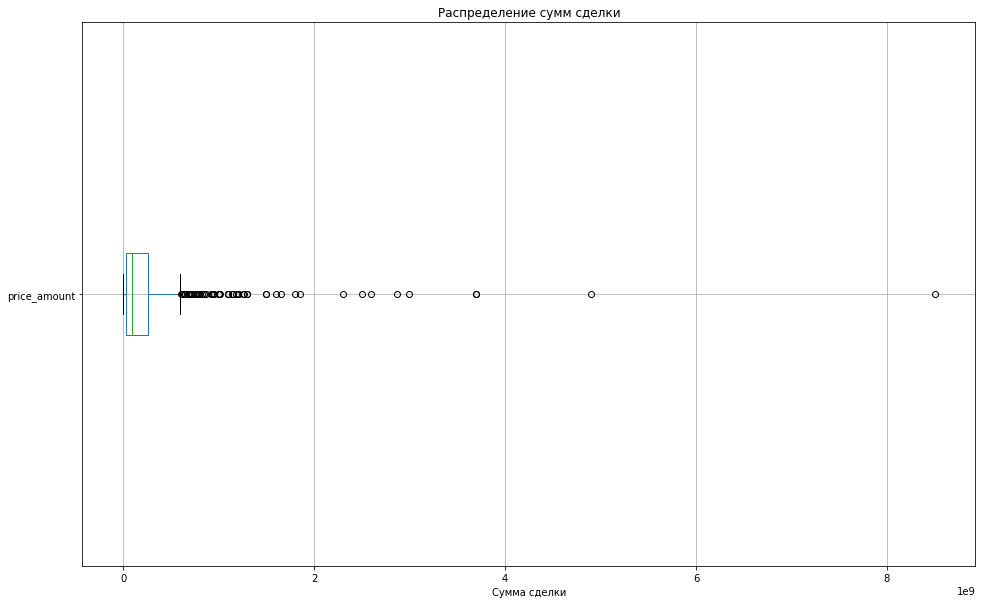

In [179]:
boxplot = df_company_dear.boxplot(
    column = 'price_amount',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение сумм сделки')
boxplot.set_xlabel('Сумма сделки')

plt.show()

- Наблюдаем значительное количество выбросов в правой области, значит, для вычисления типичных цен по категориям будем брать медиану, а не среднее.

In [180]:
df_category = df_company_dear.groupby('category_code')['price_amount'].agg(['median', 'min', 'max']) 

In [181]:
# Добавим столбец scope для каждой категории

In [182]:
df_category['scope'] = df_category['max'] - df_category['min'] 

display(df_category)

,median,min,max,scope
category_code,,,,
advertising,75000000,1400000,1800000000,1798600000
analytics,200000000,80000000,263000000,183000000
automotive,43000000,43000000,43000000,0
biotech,250000000,109000,2300000000,2299891000
cleantech,158000000,450000,930000000,929550000
consulting,122500000,39000000,295000000,256000000
ecommerce,110000000,6500000,545000000,538500000
education,10000000,10000000,10000000,0
enterprise,130500000,5600000,1600000000,1594400000


- Заметим что в таблице есть несколько категорий, у которых размах равен нулю, а значения минимума и максимума совпадают между собой и с медианой, значит эта категория содержала данные только об одном стартапе, уберем их, чтобы не было искажений результата.

In [183]:
df_category = df_category[df_category['scope'] > 0]

In [184]:
# Вычислим третий квартиль значений для всех категорий по столбцам median и scope

In [185]:
median_quantile_3 = np.quantile(df_category['median'], 0.75)
scope_quantile_3 = np.quantile(df_category['scope'], 0.75)

print(f'Третий квартиль median для всех категорий: {median_quantile_3}')
print(f'Третий квартиль scope для всех категорий: {scope_quantile_3}')

Третий квартиль median для всех категорий: 130000000.0
Третий квартиль scope для всех категорий: 1649730000.0


- Построим диаграммы типичной цены продажи и разброса цен для каждой категории стартапа на отдельных графиках, при нанесении на один график нечетко видно распределении медиан по категориям, так как они на порядом меньше разброса цен.
- Также на каждую диаграмму нанесем третий квартиль каждой величины, компании, которую имеют характеристику выше третьего квартиля отнесем в категорию компаний с типично высокими ценами или наибольшим разбросом цен за стартап.
- Такое распределение категорий объясним следюущим образом, компании с низкими ценами будут те, чьи характеристики лежат ниже первого квартиля, в диапозоне от первого до третьего будут категории со средними цена, область средних значний будет вдвое больших компаний с низкими и высокими ценами, и значения выше третьего квартиля отнесем к компаниям с типично высокими ценами. Аналогичный принцип используем для разбиения на группы категорий по разбросу цен.

In [186]:
# Построим столбчатую диаграмму, показывающую типичную цену продажи для каждой категории стартапа и третий квартиль 

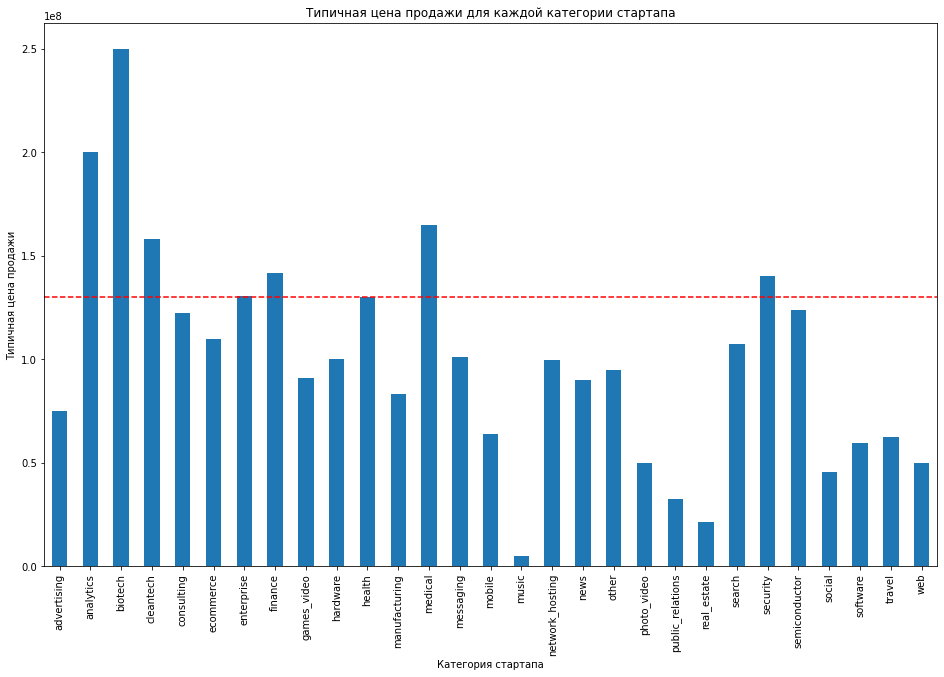

In [187]:
df_category['median'].plot(kind = 'bar', 
                 title = 'Типичная цена продажи для каждой категории стартапа',
                 xlabel = 'Категория стартапа',
                 ylabel = 'Типичная цена продажи',          
                 rot = 90,
                 figsize = (16, 10))

plt.axhline(y = median_quantile_3, color = 'red', linestyle = '--')
plt.show()

In [188]:
# Построим столбчатую диаграмму, показывающую величину разброса цен для каждой категории стартапа и третий квартиль 

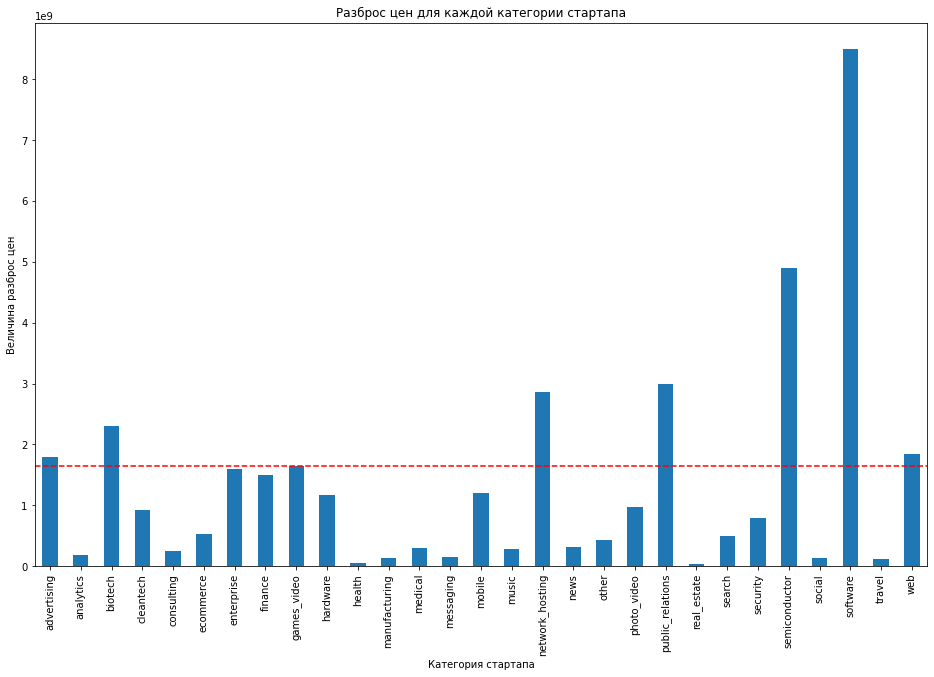

In [189]:
df_category['scope'].plot(kind = 'bar',
                 title = 'Разброс цен для каждой категории стартапа',
                 xlabel = 'Категория стартапа',
                 ylabel = 'Величина разброс цен',         
                 rot = 90,
                 figsize = (16, 10))

plt.axhline(y = scope_quantile_3, color = 'red', linestyle = '--')
plt.show()

- Выделим ТОП категорий компаний с типично высокими ценами:

In [190]:
list_high_price = df_category[df_category['median'] > median_quantile_3]
list_high_price = list_high_price['median'].sort_values(ascending = False)

print(f' Топ-{len(list_high_price)} категорий компаний с типично высокими ценами: \n\n{list_high_price}')


 Топ-7 категорий компаний с типично высокими ценами: 

category_code
biotech       250000000
analytics     200000000
medical       165000000
cleantech     158000000
finance       141500000
security      140000000
enterprise    130500000
Name: median, dtype: int64


- ТОП категорий компаний с наибольшим разбросом цен за стартап

In [191]:
list_high_scope = df_category[df_category['scope'] > scope_quantile_3]
list_high_scope = list_high_scope['scope'].sort_values(ascending = False)

print(f' Топ-{len(list_high_scope)} категорий компаний с типично высокими ценами: \n\n{list_high_scope}')

 Топ-7 категорий компаний с типично высокими ценами: 

category_code
software            8499741900
semiconductor       4891700000
public_relations    2998000000
network_hosting     2868000000
biotech             2299891000
web                 1849425000
advertising         1798600000
Name: scope, dtype: int64


- Найдем пересечения по категориям в ТОП-6 категорий компаний с типично высокими ценами и ТОП-7 категорий компаний с типично высокими ценами

In [192]:
common_category = set(list_high_price.index)&set(list_high_scope.index)

print(f'Категория стартапов, характеризующаяся типично высокими ценами и наибольшим разбросом цен одновременно {common_category}')

Категория стартапов, характеризующаяся типично высокими ценами и наибольшим разбросом цен одновременно {'biotech'}


- ТОП-7 категорий компаний с типично высокими ценами:

  - biotech    :  250000000
  - analytics  :  200000000
  - medical	   :  165000000
  - cleantech  :  158000000
  - finance    :  141500000
  - security   :  140000000
  - enterprise :  130500000
  
- ТОП-7 категорий компаний с наибольшим разбросом цен за стартап:

  - software          :  8499741900
  - semiconductor	  :  4891700000
  - public_relations  :  2998000000
  - network_hosting	  :  2868000000 
  - biotech           :  2299891000
  - web		          :  1849425000  
  - advertising	      :  1798600000
  
- Категория стартапов, характеризующаяся типично высокими ценами и наибольшим разбросом цен одновременно - biotech.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

- Продолжим работать с таблицей `company_second_part`, это таблица, в которой собраны только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [193]:
display(company_second_part.head())
company_second_part.info()

,company_id,name,category_code,status,founded_at,investment_rounds,funding_rounds,funding_total
0,1.0,Wetpaint,web,operating,2005-10-17,0.0,3.0,39750000.0
1,10.0,Flektor,games_video,acquired,NaT,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,0.0,0.0,0.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,0.0,1.0,5000000.0
4,10014.0,Mobclix,mobile,acquired,2008-03-01,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float32       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   investment_rounds  40747 non-null  float32       
 6   funding_rounds     40747 non-null  float32       
 7   funding_total      40747 non-null  float32       
dtypes: datetime64[ns](1), float32(4), object(3)
memory usage: 1.9+ MB


In [194]:
# Построим диаграмму распределения для число раундов финансирования

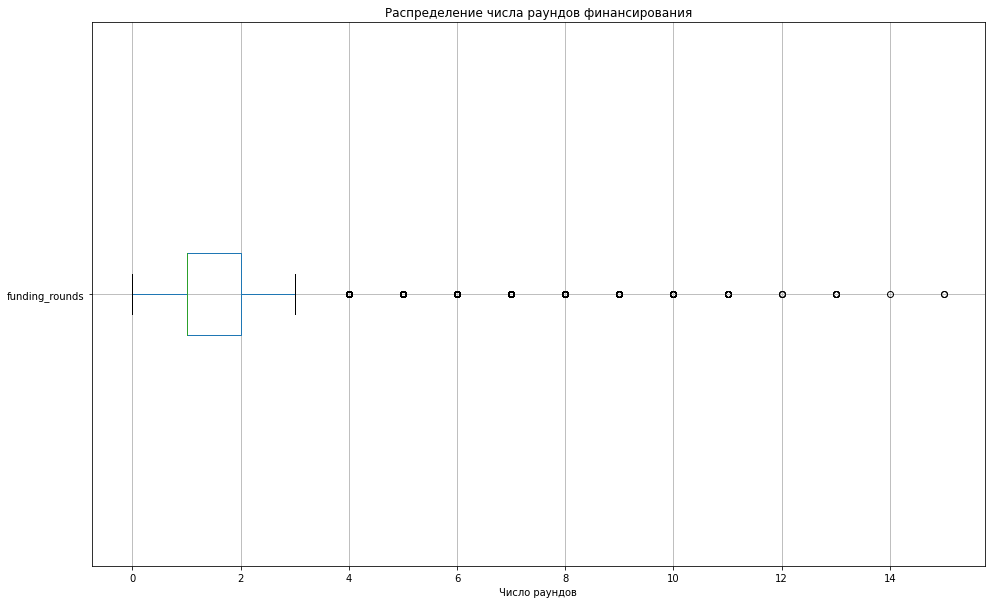

In [195]:
boxplot = company_second_part.boxplot(
    column = 'funding_rounds',
    vert = False,  
    figsize = (16, 10))

boxplot.set_title('Распределение числа раундов финансирования')
boxplot.set_xlabel('Число раундов')

plt.show()

- Вычислим типичное значение количества раундов для каждого возможного статуса стартапа как среднее значение, да, на диаграмме распределния мы видим выбросы в правой части графика, но большие значения раундов финансирования могут даать еще работающие компании или компании, которвые уже вышли на ipo.

In [196]:
funding_rounds_mean = company_second_part.groupby('status').agg({'funding_rounds' : 'mean'})

display(round(funding_rounds_mean, 2))

,funding_rounds
status,
acquired,0.52
closed,1.38
ipo,1.93
operating,1.52


- Построим диаграмму распределения типичного значения количества раундов для каждого возможного статуса стартапа

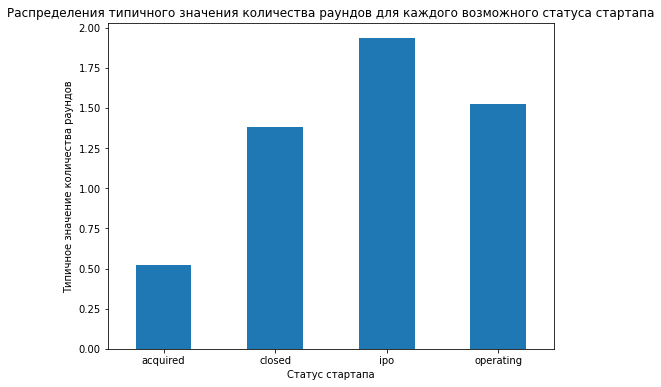

In [197]:
funding_rounds_mean.plot(kind = 'bar',
                         title = 'Распределения типичного значения количества раундов для каждого возможного статуса стартапа',
                         xlabel = 'Статус стартапа',
                         ylabel = 'Типичное значение количества раундов',         
                         rot = 0,
                         figsize = (8, 6),
                         legend = False)

plt.show()

- Компании, которые были проданы демонтрируют в среднем 0.52 раунда финансирования, дробное значение ниже единицы указывает, что были некоторые компании были проданы с нулевым числом финансирования, что говорит о том, что некоторые инвесторы предпочитают не инвестировать в стартап, а сразу купить его.
- Закрытые компании имеют среднее количество раундов финансирования равное 1.38, что значит, что такие компании редко доходят до второго этапа финансирования. 
- Компании, которые продолжают работать имеют в среднем 1.52 раунда финансирования, а те, что вышли на ipo финансировались в среднем 1.93, это самый высокий показатель среды всех статусов.


## Шаг 4. Итоговый вывод и рекомендации


- В рамках работы были исследованы датафреймы, информация в них потребовала дальнейшей предобработки: 

  - замены типа данных на более подходящий и оптимизация типа данных, чтобы уменьшить нагрузку во время обработки данных,
  - в каждом датафрейме была выполнена оценка абсолютного и относительного числа пропусков, проведена работа с обнаруженными пропусками в столбцах. необходимых для дальнейшего анализа,
  - ни в одном датафрейме не обнаружено явных дубликатов,
  - все названия столбцов приведены к snake case,
  - было обнаружено, что не все столбцы с совпадающими названиями в разных таблицах подходят для их объединения,
  - таблица `df_company_and_rounds` была разделена на две `df_company` - с информацией о компаниях и `df_rounds` - с информацией о раундах финансирования, обработанный датафрейм `df_company_final` содержит 196553 строки, вместо 217472 строк в `df_company_and_rounds` - кажждая компания в нем встречается только раз.
  
- В рамках исследовательского анализа объединённых таблиц было выявлено:

  - типичный размер собранных в рамках одного раунда средств был максимален в 2005 и составил 5500000,
  - в рамках 2013 года наблюдается поквартальный рост типичного размера собранных в рамках одного раунда средств от 800000 в первом квартале к 1669680 в четвертом. В случае общего числа кварталов с первого к третьему кварталу наблюдался рост - от 2626 раундов к 3052, а затем снижение в четвертом квартале до 2456, что говорит о том, что очень много стало мелких стартапов, которые активно финансируются, вот поэтому с одной стороны рост раундов, и рост суммарных инвестиций, а с другой стороны снижение стоимости каждого раунда финансирования,
  - самая высокая средняя доля сотрудников без информации об образовании сотрудников в компаниях с 6-10 сотрудниками - 53.18%, самая низкая в компаниях, где более 25 сотрудников - 26.55%. Это может быть связано с тем, что стартапам, перешагнувшим 5 человек нужны люди, которые не имеют образования для некоторой операционной деятельности, не требующей специального образования. По мере роста стартапа вновь повышается число квалифицированных сотрудников и больше внимания уделяется организационным моментам - предоставлению информации о сотрудниках в том числе,
  - диапазон типичного общего финансирования для одной компании лежит в области от 0 до 3800000, значения вне этого промежутка будут выбивающимися. Интересно, что для компаний, купленных за ноль или за один доллар будет 0, верхняя граница выбросов: 38750000, что на порядок больше типичного значения в разрезе всех компаний, 
  - ТОП-7 категорий компаний с типично высокими ценами:

    - biotech    :  250000000
    - analytics  :  200000000
    - medical	 :  165000000
    - cleantech  :  158000000
    - finance    :  141500000
    - security   :  140000000
    - enterprise :  130500000
  
  - ТОП-7 категорий компаний с наибольшим разбросом цен за стартап:

    - software          :  8499741900
    - semiconductor	    :  4891700000
    - public_relations  :  2998000000
    - network_hosting	:  2868000000 
    - biotech           :  2299891000
    - web		        :  1849425000  
    - advertising	    :  1798600000
  
  - Категория стартапов, характеризующаяся типично высокими ценами и наибольшим разбросом цен одновременно - biotech,
  - компании, которые были проданы демонстрируют в среднем 0.52 раунда финансирования, дробное значение ниже единицы указывает, что были некоторые компании были проданы с нулевым числом финансирования, что говорит о том, что некоторые инвесторы предпочитают не инвестировать в стартап, а сразу купить его, закрытые компании имеют среднее количество раундов финансирования равное 1.38, что значит, что такие компании редко доходят до второго этапа финансирования, компании, которые продолжают работать имеют в среднем 1.52 раунда финансирования, а те, что вышли на ipo финансировались в среднем 1.93, это самый высокий показатель среды всех статусов.
  
- Рекомендации:

  - Выполняя в дальнейшем самостоятельный анализ предоставленных данных необходимо в самом начале внимательно изучить, можно ли объединить таблицы по некоторому столбцу, даже если это название встречается в нескольких таблицах, а также внимательно следить за методом и параметрами объединения;
  - В настоящее время наблюдается тенденция уменьшения суммы в рамках одного раунда финансирования, но увеличение числа раундов финансирования, что позволяет лучше оценивать динамику успехов стартапа и рационально принимать решение о следующем этапе финансирования;
  - Если для инвесторов важна информация о сотрудниках стартапов, стоит выбирать компании, где работает более 25 человек;
  - Диапазон типичного общего финансирования для одной компании лежит в области до 3800000, при этом стоит быть аккуратнее с компаниями со значительно большей суммой типичного финансирования, так как в прошлом ряд таких компаний демонстрировали странную сумму продажи в ноль или один рубль;
  - Категория стартапов, характеризующаяся типично высокими ценами продажи компании - biotech - 250000000, однако стоит быть готовыми и к наибольшему разбросом цен в этой категории. При этом компании analytics и medical демонстрируют также высокие цены продажи - 200000000 и 165000000, но маленький разброс цен;
  - С точки зрения числа раундов финансирования есть две противоположные стратегии, либо покупать стартап до первого этапа финансирования, закрепляя его за собой, либо быть готовым к двум и более этапам финансирования.
